In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/'
import sys
sys.path.append(path_) 

# Funciones Plot

In [62]:
corrected_gap_AD

0      1.488914
1      1.112748
2      0.996224
3      0.704717
4      2.091394
         ...   
296   -0.623291
297    0.376760
298   -0.133310
299    0.455495
300   -0.210497
Name: GAP_corrected, Length: 301, dtype: float64

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_error_distribution(results_avg_test_Patient, results_avg_CN_test, nombres_regiones, colores_personalizados, ylim=(-3, 3)):
   
    # Inicializar una lista para concatenar los resultados de todas las regiones
    all_regions_data = []

    # Iterar sobre cada región y extraer los datos necesarios
    for region in nombres_regiones:
        if not results_avg_CN_test[region]:
            corrected_gap_AD = []
            corrected_gap_FTD = []
            corrected_gap_CN_test = []
        # Extraer valores corregidos de GAP para cada grupo
        else:
            corrected_gap_AD = pd.to_numeric(results_avg_test_Patient['AD'][region]['GAP_corrected'])
            corrected_gap_FTD = pd.to_numeric(results_avg_test_Patient['FTD'][region]['GAP_corrected'])
            corrected_gap_CN_test = pd.to_numeric(results_avg_CN_test[region]['GAP_corrected'])

        # Crear el DataFrame en formato largo
        data = {
            'Error': np.concatenate([corrected_gap_AD, corrected_gap_FTD, corrected_gap_CN_test]),
            'Grupo': (['AD'] * len(corrected_gap_AD) +
                      ['FTD'] * len(corrected_gap_FTD) +
                      ['CN'] * len(corrected_gap_CN_test)),
            'Región': [region] * (
                len(corrected_gap_AD) +
                len(corrected_gap_FTD) +
                len(corrected_gap_CN_test)
            )
        }

        df_errors = pd.DataFrame(data)
        all_regions_data.append(df_errors)

    # Concatenar todos los datos en un solo DataFrame
    final_df = pd.concat(all_regions_data, ignore_index=True)

    # Crear el gráfico de boxplot con colores personalizados
    plt.figure(figsize=(16, 8))
    sns.boxplot(
        data=final_df,
        x='Región',
        y='Error',
        hue='Grupo',
        palette=colores_personalizados  # Aplicar colores personalizados
    )
    plt.title('Distribución de Errores por Región y Grupo', fontsize=16)
    plt.xlabel('Región', fontsize=14)
    plt.ylabel('Error', fontsize=14)
    plt.ylim(ylim)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.legend(title='Grupo', fontsize=12, loc='upper right')
    plt.tight_layout()
    plt.show()


In [69]:
def plot_error_distribution(results_avg_test_Patient, results_avg_CN_test, nombres_regiones, colores_personalizados, ylim=(-3, 3)):
    # Inicializar una lista para concatenar los resultados de todas las regiones
    all_regions_data = []

    # Iterar sobre cada región y extraer los datos necesarios
    for region in nombres_regiones:
        if region not in results_avg_CN_test or results_avg_CN_test[region].empty:
            corrected_gap_AD = []
            corrected_gap_FTD = []
            corrected_gap_CN_test = []
        else:
            # Extraer valores corregidos de GAP para cada grupo
            corrected_gap_AD = pd.to_numeric(results_avg_test_Patient['AD'][region]['GAP_corrected'])
            corrected_gap_FTD = pd.to_numeric(results_avg_test_Patient['FTD'][region]['GAP_corrected'])
            corrected_gap_CN_test = pd.to_numeric(results_avg_CN_test[region]['GAP_corrected'])

        # Crear el DataFrame en formato largo
        data = {
            'Error': np.concatenate([corrected_gap_AD, corrected_gap_FTD, corrected_gap_CN_test]),
            'Grupo': (['AD'] * len(corrected_gap_AD) +
                      ['FTD'] * len(corrected_gap_FTD) +
                      ['CN'] * len(corrected_gap_CN_test)),
            'Región': [region] * (
                len(corrected_gap_AD) +
                len(corrected_gap_FTD) +
                len(corrected_gap_CN_test)
            )
        }

        df_errors = pd.DataFrame(data)
        all_regions_data.append(df_errors)

    # Concatenar todos los datos en un solo DataFrame
    final_df = pd.concat(all_regions_data, ignore_index=True)

    # Crear el gráfico de boxplot con colores personalizados
    plt.figure(figsize=(16, 8))
    sns.boxplot(
        data=final_df,
        x='Región',
        y='Error',
        hue='Grupo',
        palette=colores_personalizados  # Aplicar colores personalizados
    )
    plt.title('Distribución de Errores por Región y Grupo', fontsize=16)
    plt.xlabel('Región', fontsize=14)
    plt.ylabel('Error', fontsize=14)
    plt.ylim(ylim)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.legend(title='Grupo', fontsize=12, loc='upper right')
    plt.tight_layout()
    plt.show()


In [32]:
import numpy as np
import matplotlib.pyplot as plt

def graph_roc(metrics_, title=''):
    """
    Genera un gráfico ROC con las métricas almacenadas en metrics_.
    """
    # Inicializar valores promedio
    metric_tpr_mean = np.zeros(100)
    auc_values = []
    acc_list, prec_list, f1_list, rec_list = [], [], [], []
    plt.figure(figsize=(4, 4))


    # Iterar sobre las métricas por fold
    for fold, auc_roc in enumerate(metrics_["AUC"]):
        if auc_roc < 0.0:  # Umbral para ignorar curvas con AUC < 0.75
            continue

        # Interpolación de TPR y cálculo de AUC
        tpr = np.interp(np.linspace(0, 1, 100), metrics_["FPR"][fold], metrics_["TPR"][fold])
        metric_tpr_mean += tpr
        auc_values.append(auc_roc)

        # Graficar cada curva individual
        plt.plot(
            np.linspace(0, 1, 100), tpr,
            color='#747E7E', alpha=0.5, lw=0.7,
            label=None if len(metrics_["AUC"]) > 1 else f'AUC = {auc_roc:.2f}'
        )

        # Agregar métricas de evaluación por fold
        acc_list.append(metrics_["Accuracy"][fold])
        prec_list.append(metrics_["Precision"][fold])
        f1_list.append(metrics_["F1 Score"][fold])
        rec_list.append(metrics_["Recall"][fold])

    # Graficar la curva promedio si hay suficientes curvas válidas
    if auc_values:
        metric_tpr_mean /= len(auc_values)
        plt.plot(
            np.linspace(0, 1, 100), metric_tpr_mean,
            color='#F24405', lw=2, alpha=0.8,
            label=f'Promedio (AUC = {np.mean(auc_values):.2f} ± {np.std(auc_values):.2f})'
        )

    # Línea de referencia
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)

    # Configuración de los ejes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)

    # Título con métricas promedio
    plt.title(
        f'ROC Curve {title}\n'
        f'Acc = {np.mean(acc_list):.2f}, Prec = {np.mean(prec_list):.2f}, '
        f'F1 = {np.mean(f1_list):.2f}, Rec = {np.mean(rec_list):.2f}',
        fontsize=14
    )

    # Leyenda y mostrar gráfico
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


# Regressor

In [2]:
from sklearn.linear_model import ElasticNet
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer

class ElasticNetRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="ElasticNet"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = ElasticNet
        if params is None:
            self.params = {
                'alpha': 0.2,
                'l1_ratio': 0.5,  # Proporción de L1 en la regularización
                'max_iter': 10000,
                # 'tol': 0.001
            }
        if params_space is None:
            self.params_space = {
                'alpha': Real(0.001, 10.0, prior='log-uniform'),
                'l1_ratio': Real(0.0, 1.0),  # Rango de 0 a 1 para la proporción de L1
                'max_iter': Integer(100, 10000),
                'tol': Real(1e-5, 1e-2, prior='log-uniform')
            }


c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Classifier

In [3]:
from base_classifier import BaseClassifier
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer
import xgboost as xgb

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import StratifiedKFold


class XGBoostClassifier(BaseClassifier):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = xgb.XGBClassifier
        if params is None:
            self.params = {
            'objective': 'binary:logistic',  # Clasificación binaria
            'eval_metric': 'logloss',       # Métrica de evaluación
            'learning_rate': 0.1,           # Tasa de aprendizaje
            'max_depth': 6,                 # Profundidad máxima del árbol
            'subsample': 0.8,               # Proporción de muestras utilizadas por árbol
            'colsample_bytree': 0.8,        # Proporción de características utilizadas por árbol
            'reg_alpha': 0.1,               # Regularización L1
            'reg_lambda': 1.0,              # Regularización L2
            'gamma': 0.0,                   # Mínima reducción de pérdida para crear una división
            'min_child_weight': 1,          # Mínimo peso de la suma de los hijos para una división
            'n_estimators': 100,            # Número de árboles en el modelo
            'scale_pos_weight': 1.0         # Para datos desbalanceados
        }
        if params_space is None:
            self.params_space = {
                'objective'   : ['binary:logistic'],
                'eval_metric' : ['logloss', 'error', 'auc', 'aucpr'],
                'learning_rate': (0.01, 0.1, 0.2),
                'max_depth': (3, 4, 5),
                'subsample': (0.8, 0.9, 1.0),
                'colsample_bytree': (0.8, 0.9, 1.0),
                'reg_alpha': (0, 0.1, 1.0),
                'reg_lambda': (0, 0.1, 1.0),
                #'gamma': (0.001, 0.01, 0.1, 1, 10),
            }

# Instancia de Modelos

In [4]:
model_reg = ElasticNetRegressor()
model_cls = XGBoostClassifier()
Plotters = Plotter()

nameset ='ElasticNet'

# Data

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

path_metric = f'{path}Multiple_Brain_Age_Clocks/pre_data/'


file_path_CN = f'{path_metric}CN_combined.xlsx'
file_path_AD = f'{path_metric}AD_combined.xlsx'
file_path_FTD = f'{path_metric}FTD_combined.xlsx'
file_path_MCI = f'{path_metric}MCI_combined.xlsx'

df_CN = pd.read_excel(file_path_CN)
df_AD = pd.read_excel(file_path_AD)
df_FTD = pd.read_excel(file_path_FTD)
df_MCI = pd.read_excel(file_path_MCI)

df_CN_filtrado = df_CN[(df_CN['Age'] >=50) & (df_CN['Age'] <= 90)].reset_index(drop=True)
df_AD_filtrado = df_AD[(df_AD['Age'] >= 50) & (df_AD['Age'] <= 90)].reset_index(drop=True)
df_FTD_filtrado = df_FTD[(df_FTD['Age'] >= 50) & (df_FTD['Age'] <= 90)].reset_index(drop=True)
df_MCI_filtrado = df_MCI[(df_MCI['Age'] >= 50) & (df_MCI['Age'] <= 90)].reset_index(drop=True)


In [6]:
metrics_freq = df_CN.iloc[:, 62:280].columns.tolist()
metrics_aperiodic = df_CN.iloc[:, 1:31].columns.tolist()
metrics_complex = df_CN.iloc[:, 43:52].columns.tolist()


In [7]:
#CN
X_CN_freq = df_CN_filtrado[metrics_freq]
X_CN_aperiodic= df_CN_filtrado[metrics_aperiodic]
X_CN_complex= df_CN_filtrado[metrics_complex]
X_CN = pd.concat([X_CN_freq, X_CN_aperiodic, X_CN_complex], axis=1)
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID-unique"]

#Esto es para limpiar los valores nulos
df_concatenado_CN_ = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False).dropna(axis=0) 

X_CN =df_concatenado_CN_.iloc[:, :-2]
X_CN_freq = df_concatenado_CN_[metrics_freq]
X_CN_aperiodic= df_concatenado_CN_[metrics_aperiodic]
X_CN_complex= df_concatenado_CN_[metrics_complex]
y_CN= df_concatenado_CN_.iloc[:, -2]   # Labels (Age)
ID_CN = df_concatenado_CN_.iloc[:, -1] 

#AD
X_AD_freq = df_AD_filtrado[metrics_freq]
X_AD_aperiodic= df_AD_filtrado[metrics_aperiodic]
X_AD_complex= df_AD_filtrado[metrics_complex]
X_AD = pd.concat([X_AD_freq, X_AD_aperiodic, X_AD_complex], axis=1)
y_AD = df_AD_filtrado["Age"]
ID_AD = df_AD_filtrado["ID-unique"]

df_concatenado_AD_ = pd.concat([X_AD, y_AD, ID_AD], axis=1, ignore_index=False).dropna(axis=0) 

X_AD =df_concatenado_AD_.iloc[:, :-2]
X_AD_freq = df_concatenado_AD_[metrics_freq]
X_AD_aperiodic= df_concatenado_AD_[metrics_aperiodic]
X_AD_complex= df_concatenado_AD_[metrics_complex]
y_AD= df_concatenado_AD_.iloc[:, -2]   # Labels (Age)
ID_AD = df_concatenado_AD_.iloc[:, -1] 

#FTD
X_FTD_freq = df_FTD_filtrado[metrics_freq]
X_FTD_aperiodic = df_FTD_filtrado[metrics_aperiodic]
X_FTD_complex = df_FTD_filtrado[metrics_complex]
X_FTD = pd.concat([X_FTD_freq, X_FTD_aperiodic, X_FTD_complex], axis=1)
y_FTD = df_FTD_filtrado["Age"]
ID_FTD = df_FTD_filtrado["ID-unique"]

df_concatenado_FTD_ = pd.concat([X_FTD, y_FTD, ID_FTD], axis=1, ignore_index=False).dropna(axis=0) 

X_FTD_freq = df_concatenado_FTD_[metrics_freq]
X_FTD_aperiodic = df_concatenado_FTD_[metrics_aperiodic]
X_FTD_complex = df_concatenado_FTD_[metrics_complex]
X_FTD =df_concatenado_FTD_.iloc[:, :-2]
y_FTD= df_concatenado_FTD_.iloc[:, -2]   # Labels (Age)
ID_FTD = df_concatenado_FTD_.iloc[:, -1] 

#MCI
X_MCI_freq = df_MCI_filtrado[metrics_freq]
X_MCI_aperiodic = df_MCI_filtrado[metrics_aperiodic]
X_MCI_complex = df_MCI_filtrado[metrics_complex]
X_MCI = pd.concat([X_MCI_freq, X_MCI_aperiodic, X_MCI_complex], axis=1)
y_MCI = df_MCI_filtrado["Age"]
ID_MCI = df_MCI_filtrado["ID-unique"]

df_concatenado_MCI_ = pd.concat([X_MCI, y_MCI, ID_MCI], axis=1, ignore_index=False).dropna(axis=0) 
X_MCI_freq = df_concatenado_MCI_[metrics_freq]
X_MCI_aperiodic = df_concatenado_MCI_[metrics_aperiodic]
X_MCI_complex = df_concatenado_MCI_[metrics_complex]
X_MCI =df_concatenado_MCI_.iloc[:, :-2]
y_MCI= df_concatenado_MCI_.iloc[:, -2]   # Labels (Age)
ID_MCI = df_concatenado_MCI_.iloc[:, -1] 


############################
#X_combined = pd.concat([X_CN, X_AD, X_FTD, X_MCI], axis=0).reset_index(drop=True)
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)
X_AD_scaled = scaler.transform(X_AD)
X_FTD_scaled = scaler.transform(X_FTD)
X_MCI_scaled = scaler.transform(X_MCI)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)
X_AD_scaled = pd.DataFrame(X_AD_scaled, columns=X_AD.columns)
X_FTD_scaled = pd.DataFrame(X_FTD_scaled, columns=X_FTD.columns)
X_MCI_scaled = pd.DataFrame(X_MCI_scaled, columns=X_MCI.columns)



####################################
df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)
df_concatenado_AD = pd.concat([X_AD, y_AD, ID_AD], axis=1, ignore_index=False)
df_concatenado_FTD = pd.concat([X_FTD, y_FTD, ID_FTD], axis=1, ignore_index=False)
df_concatenado_MCI = pd.concat([X_MCI, y_MCI, ID_MCI], axis=1, ignore_index=False)

df_patient = [df_concatenado_AD, df_concatenado_FTD, df_concatenado_MCI]

In [8]:
import pandas as pd

# Nombres de las regiones
nombres_regiones = [
    'OCC_left', 'OCC_right', 'HPC_left', 'HPC_right', 
    'PARIET_left', 'PARIET_right', 'CING_left', 'CING_right', 
    'ORB_left', 'ORB_right', 'INS_left', 'INS_right', 
    'IFG_left', 'IFG_right', 'SFG_left', 'SFG_right', 
    'MFG_left', 'MFG_right','TEMP_left','TEMP_right'
]

# Pipeline Regression

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def pipeline_regression_clocks(df_concatenado_CN, df_concatenado_pacientes, nombres_regiones, model_reg):
    # --------------------------- 1. Selección de Métricas ---------------------------
    columnas_por_region = {}
    X_CN = df_concatenado_CN.iloc[:, :-2]
    y_CN = df_concatenado_CN.iloc[:, -2]
    ID_CN = df_concatenado_CN.iloc[:, -1]
    
    for region in nombres_regiones:
        columnas_por_region[region] = [col for col in X_CN.columns if region in col]

    # --------------------------- 2. Búsqueda de Hiperparámetros ---------------------------
    scaler = StandardScaler()
    X_CN_scaled = pd.DataFrame(scaler.fit_transform(X_CN), columns=X_CN.columns)

    opt_models = {}
    best_params = {}
    for region in nombres_regiones:
        columnas_region = columnas_por_region[region]
        if not columnas_region:
            continue

        opt_model, best_params_region = model_reg.search_best_model(
            X=X_CN_scaled[columnas_por_region[region]], y=y_CN, n_iter_=50, scoring_metric='r2'
        )
        opt_models[region] = opt_model
        best_params[region] = best_params_region

    # --------------------------- 3. Entrenamiento con Controles ---------------------------
    results_labels_CN_train = {}
    results_labels_CN_test = {}
    results_models = {}
    results_folds_CN_train = {}
    results_folds_CN_test = {}
    results_avg_CN_train = {}
    results_avg_CN_test = {}

    for region in nombres_regiones:
        
        columnas_region = columnas_por_region[region]
        
        if not columnas_region:
            continue

        best_params_region = best_params[region]

        results_labels_CN_train[region], results_labels_CN_test[region], results_models[region], \
        results_folds_CN_train[region], results_folds_CN_test[region], results_avg_CN_train[region], \
        results_avg_CN_test[region] = model_reg.trainer(
            X=X_CN[columnas_region], y=y_CN, ID=ID_CN, ID_label='ID-unique',
            n_splits=10, n_iterations=20, params_=best_params_region
        )

    # --------------------------- 4. Testeo en Pacientes ---------------------------
    results_labels_test_Patient = {'AD': {}, 'FTD': {}}
    results_folds_test_Patient = {'AD': {}, 'FTD': {}}
    results_avg_test_Patient = {'AD': {}, 'FTD': {}}

    for region in nombres_regiones:
        columnas_region = columnas_por_region[region]
        if not columnas_region:
            continue
        modelo_region = results_models[region]

        for grupo, df_paciente in zip(['AD', 'FTD'], df_concatenado_pacientes):
            X_patient = df_paciente.iloc[:, :-2]
            y_patient = df_paciente.iloc[:, -2]
            ID_patient = df_paciente.iloc[:, -1]
            
            results_labels_test_Patient[grupo][region], results_folds_test_Patient[grupo][region], \
            results_avg_test_Patient[grupo][region] = model_reg.test(
                X=X_patient[columnas_region], y=y_patient, ID_label='ID-unique',
                ID=ID_patient, n_splits=10, n_iterations=20, result_model=modelo_region
            )

    # --------------------------- 5. Concatenación de Resultados ---------------------------
    def merge_regiones_por_grupo(df_base, resultados_regiones, nombres_regiones):
        df_resultado = df_base.copy()
        for region in nombres_regiones:
            if region in resultados_regiones:
                temp_df = resultados_regiones[region][['ID-unique', 'y_pred', 'y_pred_corrected', 
                                                       'GAP', 'GAP_corrected']].rename(
                    columns={
                        'y_pred': f'y_pred_{region}',
                        'y_pred_corrected': f'y_pred_corrected_{region}',
                        'GAP': f'GAP_{region}',
                        'GAP_corrected': f'GAP_corrected_{region}'
                    }
                )
                df_resultado = pd.merge(df_resultado, temp_df, on='ID-unique', how='inner')
        return df_resultado
    
    df_base_CN = df_concatenado_CN.iloc[:, -2:]
    df_results_clocks_CN = merge_regiones_por_grupo(df_base_CN, results_avg_CN_test, nombres_regiones)

    df_base_AD = df_concatenado_pacientes[0].iloc[:, -2:]
    df_results_clocks_AD = merge_regiones_por_grupo(df_base_AD, results_avg_test_Patient['AD'], nombres_regiones)

    df_base_FTD = df_concatenado_pacientes[1].iloc[:, -2:]
    df_results_clocks_FTD = merge_regiones_por_grupo(df_base_FTD, results_avg_test_Patient['FTD'], nombres_regiones)

    

    # --------------------------- Resultado Final ---------------------------
    return (
        columnas_por_region,
        (opt_models, best_params),
        (results_labels_CN_train, results_labels_CN_test, results_models, results_folds_CN_train, 
         results_folds_CN_test, results_avg_CN_train, results_avg_CN_test),
        (results_labels_test_Patient, results_folds_test_Patient, results_avg_test_Patient),
        (df_results_clocks_CN, df_results_clocks_AD, df_results_clocks_FTD)
    )


# Pipeline Classification

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def pipeline_model_training(file_paths, model_cls, n_iter_=30, scoring_metric='accuracy', 
                            n_splits=10, n_iterations=20, scaler_type=3, test_size=0.5, random_state=42):
    
    # Leer archivos Excel y agregar Diagnosis
    df_CN_results_ = pd.read_excel(file_paths['CN'])
    df_AD_results_ = pd.read_excel(file_paths['AD'])
    df_FTD_results_ = pd.read_excel(file_paths['FTD'])
    
    # Agregar la columna Diagnosis
    df_CN_results_['Diagnosis'] = 0  # CN
    df_AD_results_['Diagnosis'] = 1  # AD
    df_FTD_results_['Diagnosis'] = 1  # FTD
    
    # Extraer columnas GAP_corrected
    gap_corrected_columns = [col for col in df_CN_results_.columns if 'GAP_corrected' in col]
    
    # Combinar datasets
    df_results_combined = pd.concat([df_CN_results_, df_AD_results_, df_FTD_results_], ignore_index=True)
    df_results_combined['ID-unique-2'] = range(len(df_results_combined))
        
    # Variables X, y e id
    X_ = df_results_combined[gap_corrected_columns]
    y_ = df_results_combined['Diagnosis']
    id_ = df_results_combined['ID-unique-2']

    # Crear dataframe concatenado
    df_concatenado = pd.concat([pd.DataFrame(X_, columns=gap_corrected_columns), 
                                y_, id_], axis=1, ignore_index=False)
    
    # Dividir en entrenamiento y prueba
    df_train, df_test = train_test_split(
        df_concatenado, test_size=test_size, random_state=random_state, stratify=df_concatenado['Diagnosis']
    )    
    # Combinar nuevamente para obtener dataset desordenado
    df_desordenado = pd.concat([df_train, df_test]).reset_index(drop=True)
    
    X = df_desordenado[gap_corrected_columns]
    y = df_desordenado['Diagnosis']
    id = df_desordenado['ID-unique-2']

    # Escalado
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    
    
    # Buscar mejores hiperparámetros
    opt_model_cls, best_params_cls = model_cls.search_best_model(
        X=X_scaled, y=y, 
        n_iter_=n_iter_, scoring_metric=scoring_metric
    )
    
    # Entrenar modelo
    results_labels_df_train, results_labels_df_test, results_model, \
    results_per_fold_train, results_per_fold_test = model_cls.trainer(
        X=X, y=y, ID = id, ID_label= 'ID-unique-2', n_splits=n_splits, n_iterations=n_iterations, 
        params_=best_params_cls, scaler=scaler_type)
    
    return (opt_model_cls, results_labels_df_train, results_labels_df_test, 
            results_model, results_per_fold_train, results_per_fold_test)


# Freq + Aperiodic + Complex

In [ ]:
# Concatenar los dataframes como entrada
df_concatenado_CN = pd.concat([X_CN_freq,X_CN_aperiodic,X_CN_complex, y_CN, ID_CN], axis=1, ignore_index=False)
df_concatenado_AD = pd.concat([X_AD_freq,X_AD_aperiodic,X_AD_complex, y_AD, ID_AD], axis=1, ignore_index=False)
df_concatenado_FTD = pd.concat([X_FTD_freq,X_FTD_aperiodic,X_FTD_complex, y_FTD, ID_FTD], axis=1, ignore_index=False)

df_concatenado_pacientes = [df_concatenado_AD, df_concatenado_FTD]

# Nombres de las regiones
nombres_regiones = [
    'OCC_left', 'OCC_right', 'HPC_left', 'HPC_right', 
    'PARIET_left', 'PARIET_right', 'CING_left', 'CING_right', 
    'ORB_left', 'ORB_right', 'INS_left', 'INS_right', 
    'IFG_left', 'IFG_right', 'SFG_left', 'SFG_right', 
    'MFG_left', 'MFG_right','TEMP_left','TEMP_right'
]

# Llamar a la función
resultados = pipeline_regression_clocks(
    df_concatenado_CN=df_concatenado_CN, 
    df_concatenado_pacientes=df_concatenado_pacientes, 
    nombres_regiones=nombres_regiones,
    model_reg=model_reg  # Debe estar definido en tu entorno
)

# Desempaquetar resultados
(columnas_por_region,   
 (opt_models, best_params), 
 (results_labels_CN_train, results_labels_CN_test, results_models, 
  results_folds_CN_train, results_folds_CN_test, results_avg_CN_train, results_avg_CN_test),
 (results_labels_test_Patient, results_folds_test_Patient, results_avg_test_Patient),
 (df_results_clocks_CN, df_results_clocks_AD, df_results_clocks_FTD)) = resultados


In [20]:
def combinar_resultados(df_base, df_resultados, df_seleccionado, columnas_extra):
   
    df_seleccionado = df_seleccionado[['ID-unique'] + columnas_extra]
    df_combinado = df_resultados.merge(df_seleccionado, on='ID-unique', how='left')
    return df_combinado

columnas_extra = ['Country_ID', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']

df_CN_combined_clocks = combinar_resultados(df_results_clocks_CN, df_results_clocks_CN, df_CN_filtrado, columnas_extra)
df_AD_combined_clocks = combinar_resultados(df_results_clocks_AD, df_results_clocks_AD, df_AD_filtrado, columnas_extra)
df_FTD_combined_clocks = combinar_resultados(df_results_clocks_FTD, df_results_clocks_FTD, df_FTD_filtrado, columnas_extra)

df_CN_combined_clocks.to_excel('results/df_CN_results_clocks_freq_aperiodic_complex.xlsx', index=False)
df_AD_combined_clocks.to_excel('results/df_AD_results_clocks_freq_aperiodic_complex.xlsx', index=False)
df_FTD_combined_clocks.to_excel('results/df_FTD_results_clocks_freq_aperiodic_complex.xlsx', index=False)
#df_MCI_combined.to_excel('results/df_MCI_results_all_features.xlsx', index=False)

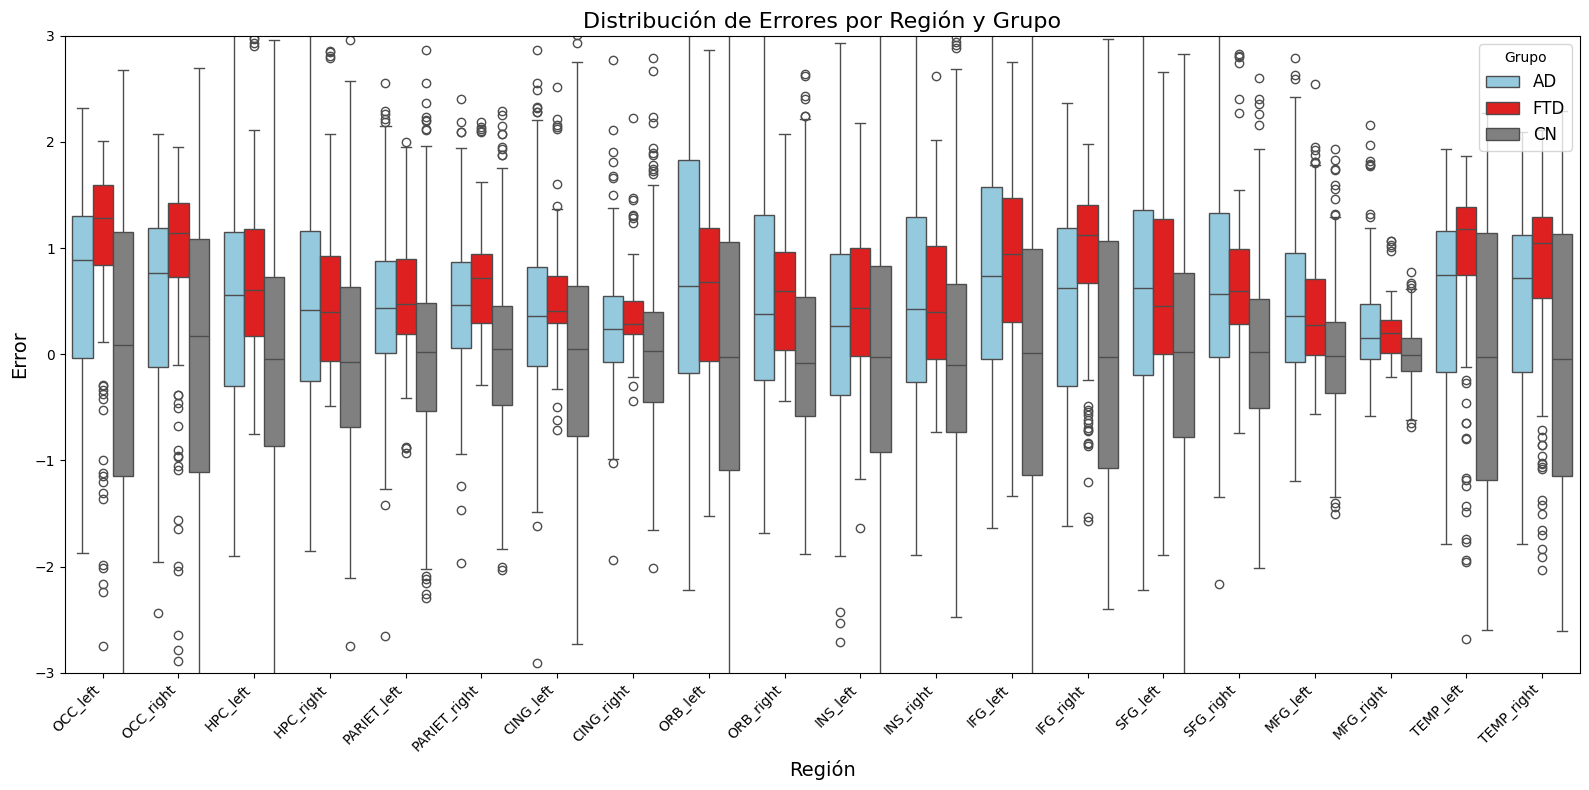

In [22]:
# Definir los datos de entrada
colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'CN': 'gray'
}

# Llamar a la función
plot_error_distribution(results_avg_test_Patient, results_avg_CN_test, nombres_regiones, colores_personalizados)


In [ ]:

file_paths = {
    'CN': 'results/df_CN_results_clocks_freq_aperiodic_complex.xlsx',
    'AD': 'results/df_AD_results_clocks_freq_aperiodic_complex.xlsx',
    'FTD': 'results/df_FTD_results_clocks_freq_aperiodic_complex.xlsx'
}

# Llamada a la función
results = pipeline_model_training(
    file_paths=file_paths,
    model_cls=model_cls,
    n_iter_=30,
    scoring_metric='accuracy',
    n_splits=10,
    n_iterations=20,
    scaler_type=3
)

# Desempaquetar resultados
opt_model_cls, results_labels_df_train, results_labels_df_test, results_model, results_per_fold_train, results_per_fold_test = results


In [25]:
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix

# Función para calcular métricas de clasificación
def clf_metrics(y_true, y_pred, y_prob):
    # Calcular métricas de clasificación
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    return {
        "AUC": auc(fpr, tpr),
        "FPR": fpr,
        "TPR": tpr,
        "Thresholds": thresholds,
        "F1 Score": f1_score(y_true, y_pred),
        "Accuracy": accuracy_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Confusion Matrix": confusion_matrix(y_true, y_pred),
    }

# Lista de métricas por fold
metrics_per_fold_cls = [
    clf_metrics(fold['y_labels'], fold['y_pred'], fold['y_prob'])
    for fold in results_per_fold_test
]

# Consolidar métricas por tipo
metrics_ = {key: [] for key in metrics_per_fold_cls[0].keys()}
for metrics in metrics_per_fold_cls:
    for key, value in metrics.items():
        metrics_[key].append(value)


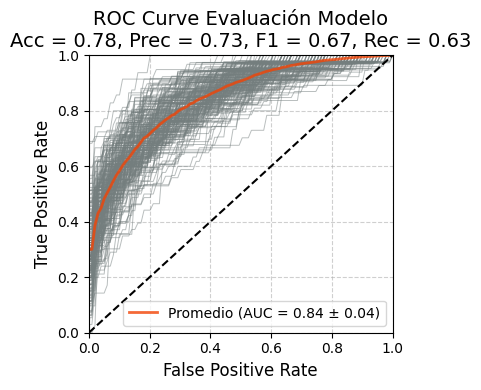

In [33]:
graph_roc(metrics_, title="Evaluación Modelo")


In [28]:
import numpy as np

# Inicializa una lista para almacenar los F-scores de cada modelo
f_scores_all = []

# Recorre los 200 modelos
for i in range(200):
    # Obtén los F-scores del modelo i
    f_scores = results_model['model'][i].get_booster().get_score()
    # Convierte el diccionario de F-scores en una lista y agrégala a f_scores_all
    f_scores_all.append(list(f_scores.values()))

# Transforma la lista de listas en un arreglo de numpy para facilitar cálculos
f_scores_array = np.array(f_scores_all)
    
# Calcula el promedio y la desviación estándar de los F-scores por clase
f_scores_avg = np.mean(f_scores_array, axis=0)
f_scores_std = np.std(f_scores_array, axis=0)

# Guarda los resultados en el formato requerido
f_scores = list(f_scores_avg)
f_score_std = list(f_scores_std)

print("f_scores =", f_scores)  # Promedio de F-score por clase
print("f_score_std =", f_score_std)  # Desviación estándar de F-score por clase

avg_conf_matrix = np.mean(np.array(metrics_["Confusion Matrix"]), axis=0)

f_scores = [52.055, 43.965, 43.51, 52.525, 42.425, 63.595, 58.715, 43.475, 54.415, 43.065, 90.695, 57.155, 66.56, 47.14, 48.84, 62.125, 47.03, 66.195, 52.01, 67.9]
f_score_std = [6.567493814233855, 6.702520048459386, 6.5673358373087645, 7.137182567372084, 6.292406137559778, 7.090202747453703, 7.209977461823302, 7.215911238367612, 6.114963205122334, 5.886490890165378, 7.458684535492836, 6.786823631125241, 7.220553995366284, 6.407058607504695, 6.732339860702223, 6.496104601990335, 6.694706864381741, 6.859079748770968, 6.357664665582796, 6.605300901548696]


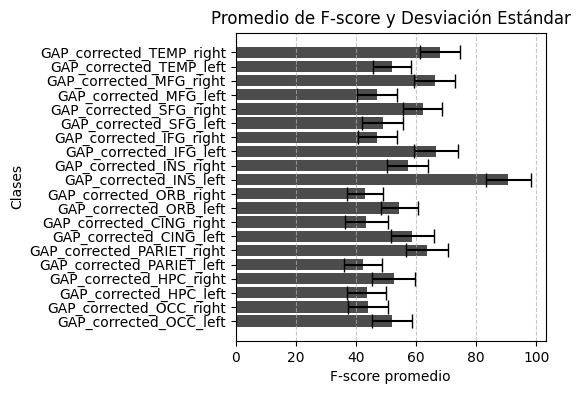

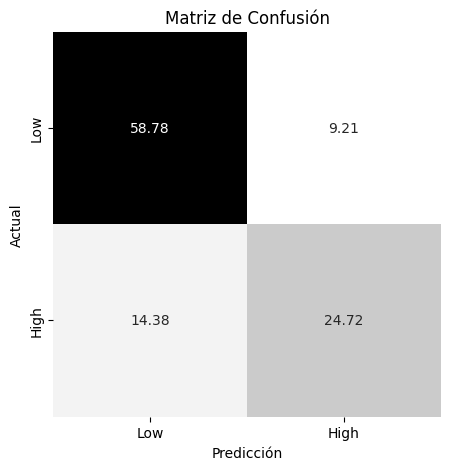

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Datos de ejemplo
#f_scores = [0.82, 0.78]  # Promedio de F-score por clase
#f_score_std = [0.04, 0.05]  # Desviación estándar de F-score por clase
df_CN_results_ = pd.read_excel('results/df_CN_results_clocks_freq_aperiodic_complex.xlsx')

gap_corrected_columns = [col for col in df_CN_results_.columns if 'GAP_corrected' in col]

classes = gap_corrected_columns

# Datos de la matriz de confusión
conf_matrix = avg_conf_matrix

# 1. Gráfico de barras horizontal de F-score (Promedio y Desviación Estándar)
plt.figure(figsize=(4, 4))
plt.barh(classes, f_scores, xerr=f_score_std, capsize=5, color='black', alpha=0.7)
plt.ylabel('Clases')
plt.xlabel('F-score promedio')
plt.title('Promedio de F-score y Desviación Estándar')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

classes_ = classes = ['Low', 'High']
# 2. Matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Greys', cbar=False,
            xticklabels=classes_, yticklabels=classes)
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


# Freq

In [ ]:
# Concatenar los dataframes como entrada
df_concatenado_CN = pd.concat([X_CN_freq, y_CN, ID_CN], axis=1, ignore_index=False)
df_concatenado_AD = pd.concat([X_AD_freq, y_AD, ID_AD], axis=1, ignore_index=False)
df_concatenado_FTD = pd.concat([X_FTD_freq, y_FTD, ID_FTD], axis=1, ignore_index=False)

df_concatenado_pacientes = [df_concatenado_AD, df_concatenado_FTD]

# Nombres de las regiones
nombres_regiones = [
    'OCC_left', 'OCC_right', 'HPC_left', 'HPC_right', 
    'PARIET_left', 'PARIET_right', 'CING_left', 'CING_right', 
    'ORB_left', 'ORB_right', 'INS_left', 'INS_right', 
    'IFG_left', 'IFG_right', 'SFG_left', 'SFG_right', 
    'MFG_left', 'MFG_right','TEMP_left','TEMP_right'
]

# Llamar a la función
resultados = pipeline_regression_clocks(
    df_concatenado_CN=df_concatenado_CN, 
    df_concatenado_pacientes=df_concatenado_pacientes, 
    nombres_regiones=nombres_regiones,
    model_reg=model_reg  # Debe estar definido en tu entorno
)

# Desempaquetar resultados
(columnas_por_region,   
 (opt_models, best_params), 
 (results_labels_CN_train, results_labels_CN_test, results_models, 
  results_folds_CN_train, results_folds_CN_test, results_avg_CN_train, results_avg_CN_test),
 (results_labels_test_Patient, results_folds_test_Patient, results_avg_test_Patient),
 (df_results_clocks_CN, df_results_clocks_AD, df_results_clocks_FTD)) = resultados


In [36]:
def combinar_resultados(df_base, df_resultados, df_seleccionado, columnas_extra):
   
    df_seleccionado = df_seleccionado[['ID-unique'] + columnas_extra]
    df_combinado = df_resultados.merge(df_seleccionado, on='ID-unique', how='left')
    return df_combinado

columnas_extra = ['Country_ID', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']

df_CN_combined_clocks = combinar_resultados(df_results_clocks_CN, df_results_clocks_CN, df_CN_filtrado, columnas_extra)
df_AD_combined_clocks = combinar_resultados(df_results_clocks_AD, df_results_clocks_AD, df_AD_filtrado, columnas_extra)
df_FTD_combined_clocks = combinar_resultados(df_results_clocks_FTD, df_results_clocks_FTD, df_FTD_filtrado, columnas_extra)

df_CN_combined_clocks.to_excel('results/df_CN_results_clocks_freq.xlsx', index=False)
df_AD_combined_clocks.to_excel('results/df_AD_results_clocks_freq.xlsx', index=False)
df_FTD_combined_clocks.to_excel('results/df_FTD_results_clocks_freq.xlsx', index=False)
#df_MCI_combined.to_excel('results/df_MCI_results_all_features.xlsx', index=False)

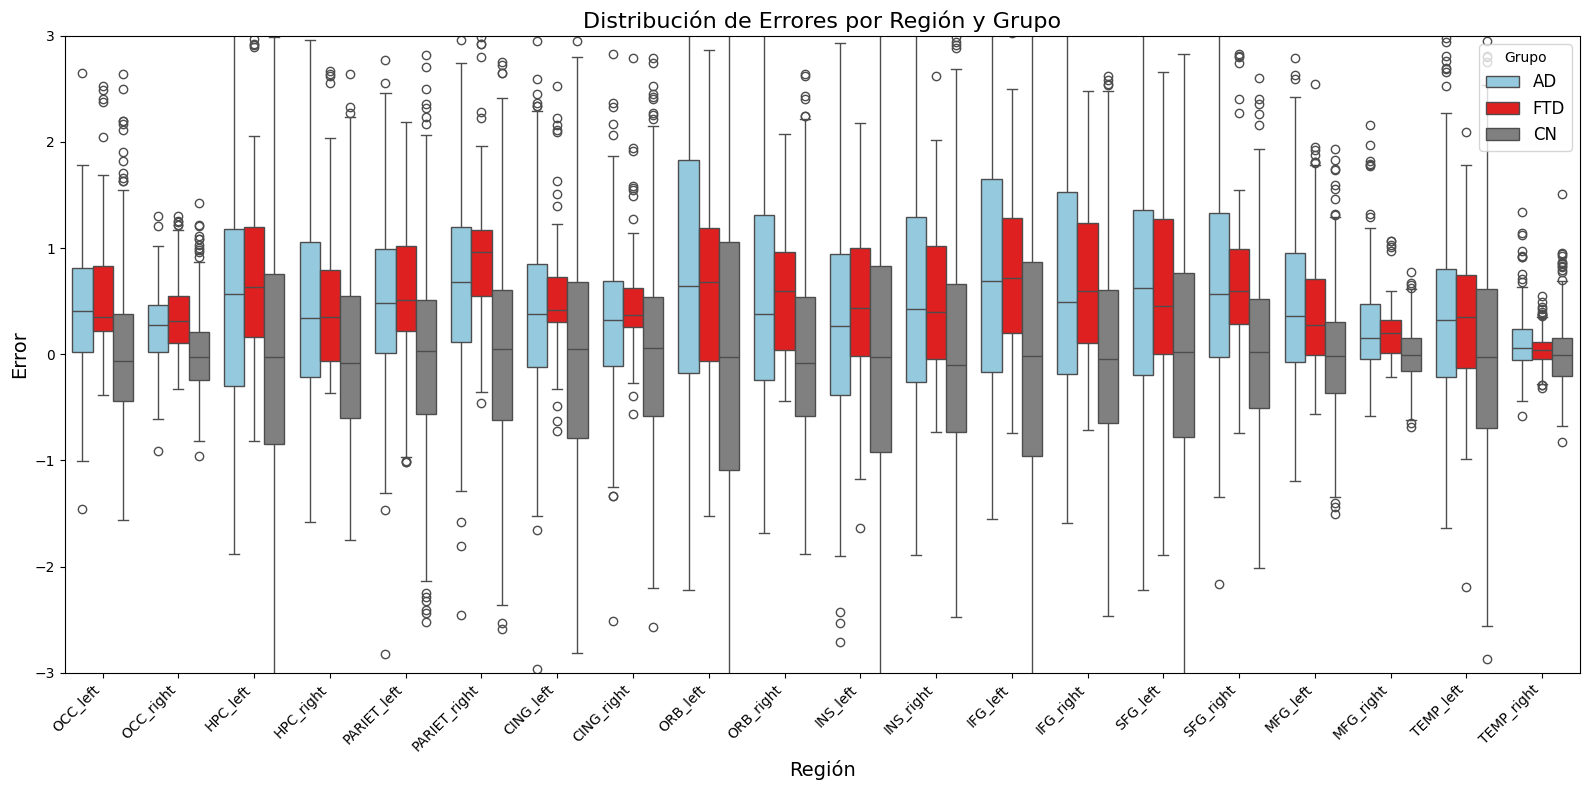

In [37]:
# Definir los datos de entrada
colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'CN': 'gray'
}

# Llamar a la función
plot_error_distribution(results_avg_test_Patient, results_avg_CN_test, nombres_regiones, colores_personalizados)


In [ ]:

file_paths = {
    'CN': 'results/df_CN_results_clocks_freq.xlsx',
    'AD': 'results/df_AD_results_clocks_freq.xlsx',
    'FTD': 'results/df_FTD_results_clocks_freq.xlsx'
}

# Llamada a la función
results = pipeline_model_training(
    file_paths=file_paths,
    model_cls=model_cls,
    n_iter_=30,
    scoring_metric='accuracy',
    n_splits=10,
    n_iterations=20,
    scaler_type=3
)

# Desempaquetar resultados
opt_model_cls, results_labels_df_train, results_labels_df_test, results_model, results_per_fold_train, results_per_fold_test = results


In [40]:
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix

# Función para calcular métricas de clasificación
def clf_metrics(y_true, y_pred, y_prob):
    # Calcular métricas de clasificación
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    return {
        "AUC": auc(fpr, tpr),
        "FPR": fpr,
        "TPR": tpr,
        "Thresholds": thresholds,
        "F1 Score": f1_score(y_true, y_pred),
        "Accuracy": accuracy_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Confusion Matrix": confusion_matrix(y_true, y_pred),
    }

# Lista de métricas por fold
metrics_per_fold_cls = [
    clf_metrics(fold['y_labels'], fold['y_pred'], fold['y_prob'])
    for fold in results_per_fold_test
]

# Consolidar métricas por tipo
metrics_ = {key: [] for key in metrics_per_fold_cls[0].keys()}
for metrics in metrics_per_fold_cls:
    for key, value in metrics.items():
        metrics_[key].append(value)


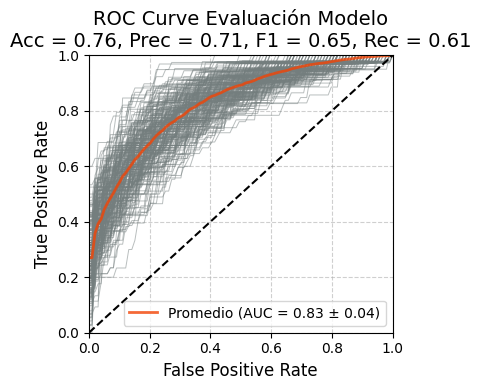

In [41]:
graph_roc(metrics_, title="Evaluación Modelo")


In [42]:
import numpy as np

# Inicializa una lista para almacenar los F-scores de cada modelo
f_scores_all = []

# Recorre los 200 modelos
for i in range(200):
    # Obtén los F-scores del modelo i
    f_scores = results_model['model'][i].get_booster().get_score()
    # Convierte el diccionario de F-scores en una lista y agrégala a f_scores_all
    f_scores_all.append(list(f_scores.values()))

# Transforma la lista de listas en un arreglo de numpy para facilitar cálculos
f_scores_array = np.array(f_scores_all)
    
# Calcula el promedio y la desviación estándar de los F-scores por clase
f_scores_avg = np.mean(f_scores_array, axis=0)
f_scores_std = np.std(f_scores_array, axis=0)

# Guarda los resultados en el formato requerido
f_scores = list(f_scores_avg)
f_score_std = list(f_scores_std)

print("f_scores =", f_scores)  # Promedio de F-score por clase
print("f_score_std =", f_score_std)  # Desviación estándar de F-score por clase

avg_conf_matrix = np.mean(np.array(metrics_["Confusion Matrix"]), axis=0)

f_scores = [49.585, 64.575, 45.33, 41.265, 42.31, 48.465, 54.38, 44.035, 50.24, 45.245, 68.195, 51.905, 65.625, 35.72, 51.85, 52.375, 47.25, 60.585, 54.775, 70.395]
f_score_std = [6.771467713871197, 6.268522553201829, 6.4452385526061, 6.157497462443651, 6.073211670936559, 5.644357802265902, 6.859708448615001, 6.811297600310825, 5.960067113716086, 6.849450707903519, 5.9947456159540256, 6.045326707465857, 5.656357043186012, 6.18236200816484, 7.088547100781653, 6.016176111119089, 6.580843410992241, 5.841470277250412, 7.04445704082295, 8.233406038815284]


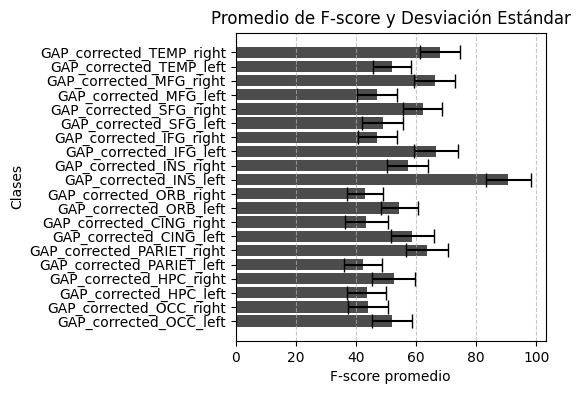

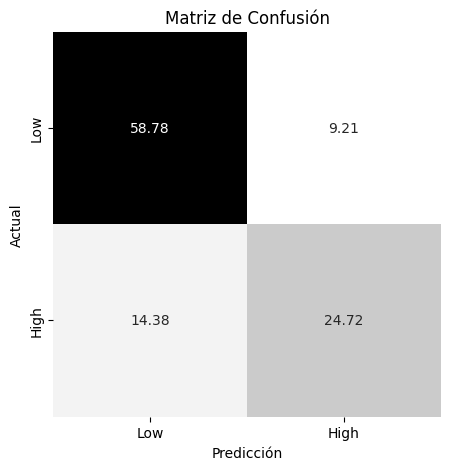

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Datos de ejemplo
#f_scores = [0.82, 0.78]  # Promedio de F-score por clase
#f_score_std = [0.04, 0.05]  # Desviación estándar de F-score por clase
df_CN_results_ = pd.read_excel('results/df_CN_results_clocks_freq.xlsx')

gap_corrected_columns = [col for col in df_CN_results_.columns if 'GAP_corrected' in col]

classes = gap_corrected_columns

# Datos de la matriz de confusión
conf_matrix = avg_conf_matrix

# 1. Gráfico de barras horizontal de F-score (Promedio y Desviación Estándar)
plt.figure(figsize=(4, 4))
plt.barh(classes, f_scores, xerr=f_score_std, capsize=5, color='black', alpha=0.7)
plt.ylabel('Clases')
plt.xlabel('F-score promedio')
plt.title('Promedio de F-score y Desviación Estándar')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

classes_ = classes = ['Low', 'High']
# 2. Matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Greys', cbar=False,
            xticklabels=classes_, yticklabels=classes)
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


# Freq + Aperiodic

In [ ]:
# Concatenar los dataframes como entrada
df_concatenado_CN = pd.concat([X_CN_freq,X_CN_aperiodic, y_CN, ID_CN], axis=1, ignore_index=False)
df_concatenado_AD = pd.concat([X_AD_freq,X_AD_aperiodic, y_AD, ID_AD], axis=1, ignore_index=False)
df_concatenado_FTD = pd.concat([X_FTD_freq,X_FTD_aperiodic, y_FTD, ID_FTD], axis=1, ignore_index=False)

df_concatenado_pacientes = [df_concatenado_AD, df_concatenado_FTD]

# Nombres de las regiones
nombres_regiones = [
    'OCC_left', 'OCC_right', 'HPC_left', 'HPC_right', 
    'PARIET_left', 'PARIET_right', 'CING_left', 'CING_right', 
    'ORB_left', 'ORB_right', 'INS_left', 'INS_right', 
    'IFG_left', 'IFG_right', 'SFG_left', 'SFG_right', 
    'MFG_left', 'MFG_right','TEMP_left','TEMP_right'
]

# Llamar a la función
resultados = pipeline_regression_clocks(
    df_concatenado_CN=df_concatenado_CN, 
    df_concatenado_pacientes=df_concatenado_pacientes, 
    nombres_regiones=nombres_regiones,
    model_reg=model_reg  # Debe estar definido en tu entorno
)

# Desempaquetar resultados
(columnas_por_region,   
 (opt_models, best_params), 
 (results_labels_CN_train, results_labels_CN_test, results_models, 
  results_folds_CN_train, results_folds_CN_test, results_avg_CN_train, results_avg_CN_test),
 (results_labels_test_Patient, results_folds_test_Patient, results_avg_test_Patient),
 (df_results_clocks_CN, df_results_clocks_AD, df_results_clocks_FTD)) = resultados


In [44]:
def combinar_resultados(df_base, df_resultados, df_seleccionado, columnas_extra):
   
    df_seleccionado = df_seleccionado[['ID-unique'] + columnas_extra]
    df_combinado = df_resultados.merge(df_seleccionado, on='ID-unique', how='left')
    return df_combinado

columnas_extra = ['Country_ID', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']

df_CN_combined_clocks = combinar_resultados(df_results_clocks_CN, df_results_clocks_CN, df_CN_filtrado, columnas_extra)
df_AD_combined_clocks = combinar_resultados(df_results_clocks_AD, df_results_clocks_AD, df_AD_filtrado, columnas_extra)
df_FTD_combined_clocks = combinar_resultados(df_results_clocks_FTD, df_results_clocks_FTD, df_FTD_filtrado, columnas_extra)

df_CN_combined_clocks.to_excel('results/df_CN_results_clocks_freq_aperiodic.xlsx', index=False)
df_AD_combined_clocks.to_excel('results/df_AD_results_clocks_freq_aperiodic.xlsx', index=False)
df_FTD_combined_clocks.to_excel('results/df_FTD_results_clocks_freq_aperiodic.xlsx', index=False)
#df_MCI_combined.to_excel('results/df_MCI_results_all_features.xlsx', index=False)

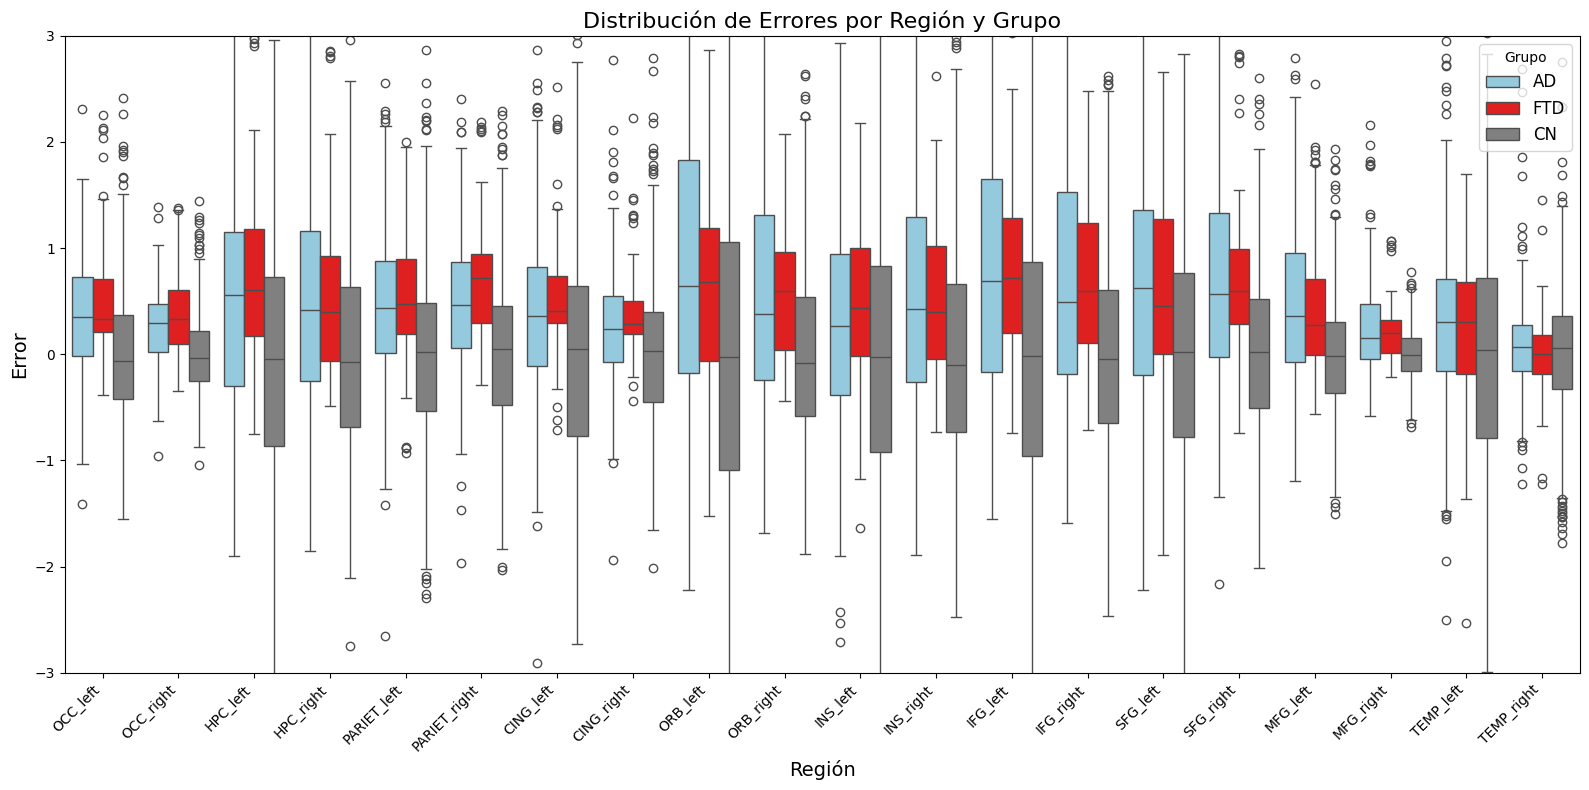

In [45]:
# Definir los datos de entrada
colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'CN': 'gray'
}

# Llamar a la función
plot_error_distribution(results_avg_test_Patient, results_avg_CN_test, nombres_regiones, colores_personalizados)


In [ ]:

file_paths = {
    'CN': 'results/df_CN_results_clocks_freq_aperiodic.xlsx',
    'AD': 'results/df_AD_results_clocks_freq_aperiodic.xlsx',
    'FTD': 'results/df_FTD_results_clocks_freq_aperiodic.xlsx'
}

# Llamada a la función
results = pipeline_model_training(
    file_paths=file_paths,
    model_cls=model_cls,
    n_iter_=30,
    scoring_metric='accuracy',
    n_splits=10,
    n_iterations=20,
    scaler_type=3
)

# Desempaquetar resultados
opt_model_cls, results_labels_df_train, results_labels_df_test, results_model, results_per_fold_train, results_per_fold_test = results


In [47]:
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix

# Función para calcular métricas de clasificación
def clf_metrics(y_true, y_pred, y_prob):
    # Calcular métricas de clasificación
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    return {
        "AUC": auc(fpr, tpr),
        "FPR": fpr,
        "TPR": tpr,
        "Thresholds": thresholds,
        "F1 Score": f1_score(y_true, y_pred),
        "Accuracy": accuracy_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Confusion Matrix": confusion_matrix(y_true, y_pred),
    }

# Lista de métricas por fold
metrics_per_fold_cls = [
    clf_metrics(fold['y_labels'], fold['y_pred'], fold['y_prob'])
    for fold in results_per_fold_test
]

# Consolidar métricas por tipo
metrics_ = {key: [] for key in metrics_per_fold_cls[0].keys()}
for metrics in metrics_per_fold_cls:
    for key, value in metrics.items():
        metrics_[key].append(value)


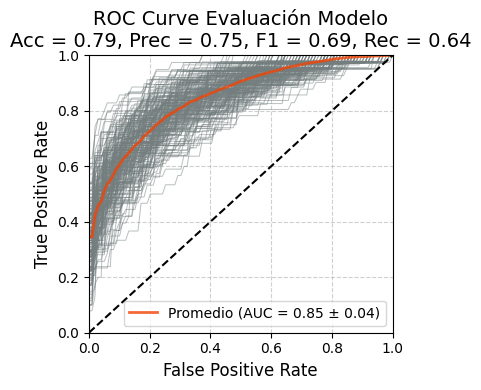

In [48]:
graph_roc(metrics_, title="Evaluación Modelo")


In [49]:
import numpy as np

# Inicializa una lista para almacenar los F-scores de cada modelo
f_scores_all = []

# Recorre los 200 modelos
for i in range(200):
    # Obtén los F-scores del modelo i
    f_scores = results_model['model'][i].get_booster().get_score()
    # Convierte el diccionario de F-scores en una lista y agrégala a f_scores_all
    f_scores_all.append(list(f_scores.values()))

# Transforma la lista de listas en un arreglo de numpy para facilitar cálculos
f_scores_array = np.array(f_scores_all)
    
# Calcula el promedio y la desviación estándar de los F-scores por clase
f_scores_avg = np.mean(f_scores_array, axis=0)
f_scores_std = np.std(f_scores_array, axis=0)

# Guarda los resultados en el formato requerido
f_scores = list(f_scores_avg)
f_score_std = list(f_scores_std)

print("f_scores =", f_scores)  # Promedio de F-score por clase
print("f_score_std =", f_score_std)  # Desviación estándar de F-score por clase

avg_conf_matrix = np.mean(np.array(metrics_["Confusion Matrix"]), axis=0)

f_scores = [64.91, 114.77, 55.075, 66.845, 57.66, 77.6, 63.825, 62.49, 70.63, 47.63, 108.35, 62.975, 88.18, 45.135, 68.47, 74.52, 64.935, 97.04, 82.085, 150.95]
f_score_std = [10.617057031023236, 9.953748037799631, 10.200459548471331, 9.36274398881012, 8.381789785004155, 9.346657156438333, 9.340469741934827, 9.09064904173514, 10.021631603686101, 8.341648518128777, 10.073604121663706, 8.8895655124421, 9.058013027148945, 8.532102613072581, 9.505740370954806, 8.872970190415382, 9.86411552041033, 9.846745655291402, 9.953279610259123, 11.27463968382139]


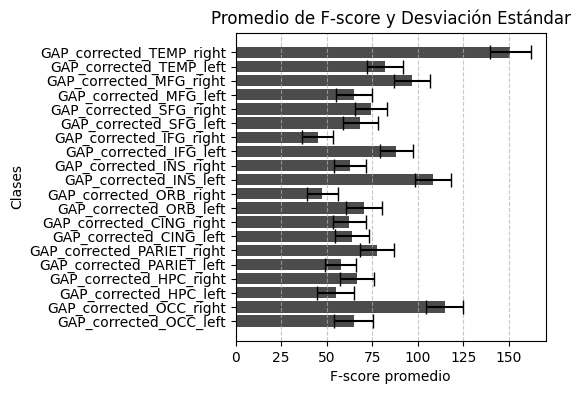

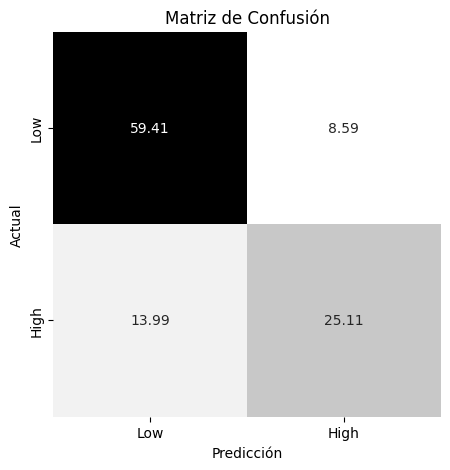

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Datos de ejemplo
#f_scores = [0.82, 0.78]  # Promedio de F-score por clase
#f_score_std = [0.04, 0.05]  # Desviación estándar de F-score por clase
df_CN_results_ = pd.read_excel('results/df_CN_results_clocks_freq_aperiodic_complex.xlsx')

gap_corrected_columns = [col for col in df_CN_results_.columns if 'GAP_corrected' in col]

classes = gap_corrected_columns

# Datos de la matriz de confusión
conf_matrix = avg_conf_matrix

# 1. Gráfico de barras horizontal de F-score (Promedio y Desviación Estándar)
plt.figure(figsize=(4, 4))
plt.barh(classes, f_scores, xerr=f_score_std, capsize=5, color='black', alpha=0.7)
plt.ylabel('Clases')
plt.xlabel('F-score promedio')
plt.title('Promedio de F-score y Desviación Estándar')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

classes_ = classes = ['Low', 'High']
# 2. Matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Greys', cbar=False,
            xticklabels=classes_, yticklabels=classes)
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


# Freq + Complex

In [ ]:
# Concatenar los dataframes como entrada
df_concatenado_CN = pd.concat([X_CN_freq,X_CN_complex, y_CN, ID_CN], axis=1, ignore_index=False)
df_concatenado_AD = pd.concat([X_AD_freq,X_AD_complex, y_AD, ID_AD], axis=1, ignore_index=False)
df_concatenado_FTD = pd.concat([X_FTD_freq,X_FTD_complex, y_FTD, ID_FTD], axis=1, ignore_index=False)

df_concatenado_pacientes = [df_concatenado_AD, df_concatenado_FTD]

# Nombres de las regiones
nombres_regiones = [
    'OCC_left', 'OCC_right', 'HPC_left', 'HPC_right', 
    'PARIET_left', 'PARIET_right', 'CING_left', 'CING_right', 
    'ORB_left', 'ORB_right', 'INS_left', 'INS_right', 
    'IFG_left', 'IFG_right', 'SFG_left', 'SFG_right', 
    'MFG_left', 'MFG_right','TEMP_left','TEMP_right'
]

# Llamar a la función
resultados = pipeline_regression_clocks(
    df_concatenado_CN=df_concatenado_CN, 
    df_concatenado_pacientes=df_concatenado_pacientes, 
    nombres_regiones=nombres_regiones,
    model_reg=model_reg  # Debe estar definido en tu entorno
)

# Desempaquetar resultados
(columnas_por_region,   
 (opt_models, best_params), 
 (results_labels_CN_train, results_labels_CN_test, results_models, 
  results_folds_CN_train, results_folds_CN_test, results_avg_CN_train, results_avg_CN_test),
 (results_labels_test_Patient, results_folds_test_Patient, results_avg_test_Patient),
 (df_results_clocks_CN, df_results_clocks_AD, df_results_clocks_FTD)) = resultados


In [52]:
def combinar_resultados(df_base, df_resultados, df_seleccionado, columnas_extra):
   
    df_seleccionado = df_seleccionado[['ID-unique'] + columnas_extra]
    df_combinado = df_resultados.merge(df_seleccionado, on='ID-unique', how='left')
    return df_combinado

columnas_extra = ['Country_ID', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']

df_CN_combined_clocks = combinar_resultados(df_results_clocks_CN, df_results_clocks_CN, df_CN_filtrado, columnas_extra)
df_AD_combined_clocks = combinar_resultados(df_results_clocks_AD, df_results_clocks_AD, df_AD_filtrado, columnas_extra)
df_FTD_combined_clocks = combinar_resultados(df_results_clocks_FTD, df_results_clocks_FTD, df_FTD_filtrado, columnas_extra)

df_CN_combined_clocks.to_excel('results/df_CN_results_clocks_freq_complex.xlsx', index=False)
df_AD_combined_clocks.to_excel('results/df_AD_results_clocks_freq_complex.xlsx', index=False)
df_FTD_combined_clocks.to_excel('results/df_FTD_results_clocks_freq_complex.xlsx', index=False)
#df_MCI_combined.to_excel('results/df_MCI_results_all_features.xlsx', index=False)

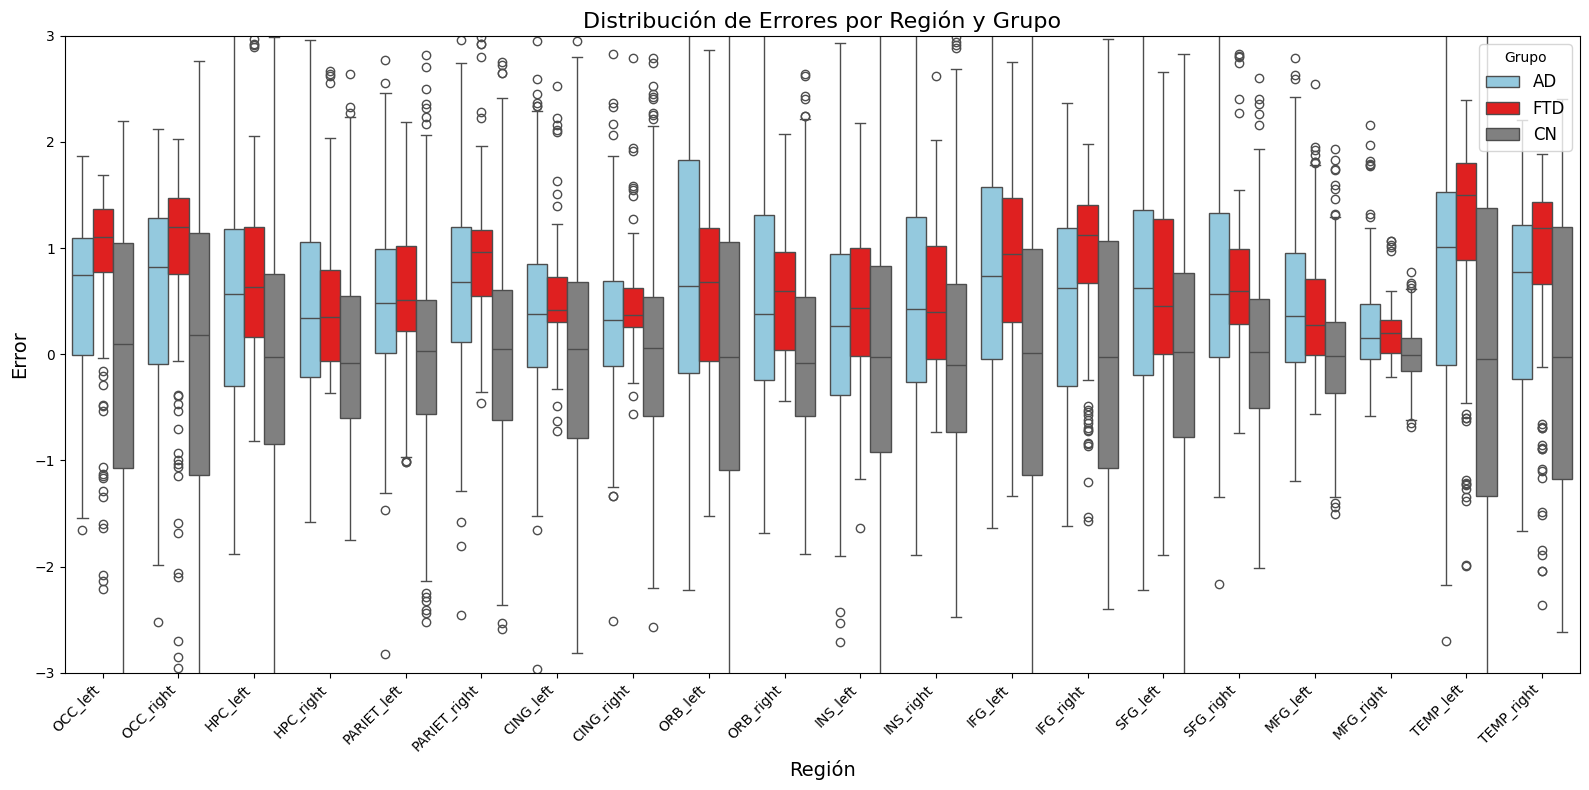

In [53]:
# Definir los datos de entrada
colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'CN': 'gray'
}

# Llamar a la función
plot_error_distribution(results_avg_test_Patient, results_avg_CN_test, nombres_regiones, colores_personalizados)


In [ ]:

file_paths = {
    'CN': 'results/df_CN_results_clocks_freq_complex.xlsx',
    'AD': 'results/df_AD_results_clocks_freq_complex.xlsx',
    'FTD': 'results/df_FTD_results_clocks_freq_complex.xlsx'
}

# Llamada a la función
results = pipeline_model_training(
    file_paths=file_paths,
    model_cls=model_cls,
    n_iter_=30,
    scoring_metric='accuracy',
    n_splits=10,
    n_iterations=20,
    scaler_type=3
)

# Desempaquetar resultados
opt_model_cls, results_labels_df_train, results_labels_df_test, results_model, results_per_fold_train, results_per_fold_test = results


In [55]:
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix

# Función para calcular métricas de clasificación
def clf_metrics(y_true, y_pred, y_prob):
    # Calcular métricas de clasificación
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    return {
        "AUC": auc(fpr, tpr),
        "FPR": fpr,
        "TPR": tpr,
        "Thresholds": thresholds,
        "F1 Score": f1_score(y_true, y_pred),
        "Accuracy": accuracy_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Confusion Matrix": confusion_matrix(y_true, y_pred),
    }

# Lista de métricas por fold
metrics_per_fold_cls = [
    clf_metrics(fold['y_labels'], fold['y_pred'], fold['y_prob'])
    for fold in results_per_fold_test
]

# Consolidar métricas por tipo
metrics_ = {key: [] for key in metrics_per_fold_cls[0].keys()}
for metrics in metrics_per_fold_cls:
    for key, value in metrics.items():
        metrics_[key].append(value)


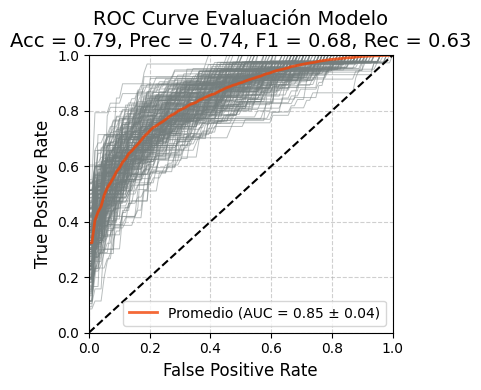

In [56]:
graph_roc(metrics_, title="Evaluación Modelo")


In [57]:
import numpy as np

# Inicializa una lista para almacenar los F-scores de cada modelo
f_scores_all = []

# Recorre los 200 modelos
for i in range(200):
    # Obtén los F-scores del modelo i
    f_scores = results_model['model'][i].get_booster().get_score()
    # Convierte el diccionario de F-scores en una lista y agrégala a f_scores_all
    f_scores_all.append(list(f_scores.values()))

# Transforma la lista de listas en un arreglo de numpy para facilitar cálculos
f_scores_array = np.array(f_scores_all)
    
# Calcula el promedio y la desviación estándar de los F-scores por clase
f_scores_avg = np.mean(f_scores_array, axis=0)
f_scores_std = np.std(f_scores_array, axis=0)

# Guarda los resultados en el formato requerido
f_scores = list(f_scores_avg)
f_score_std = list(f_scores_std)

print("f_scores =", f_scores)  # Promedio de F-score por clase
print("f_score_std =", f_score_std)  # Desviación estándar de F-score por clase

avg_conf_matrix = np.mean(np.array(metrics_["Confusion Matrix"]), axis=0)

f_scores = [60.65, 76.665, 75.97, 68.545, 60.34, 87.595, 94.57, 59.27, 85.92, 68.68, 109.595, 84.47, 88.55, 79.935, 68.28, 86.24, 77.295, 98.71, 74.125, 78.385]
f_score_std = [7.708923400838796, 8.697285496061404, 9.927189934719692, 8.990994105214394, 8.44241671560934, 7.251963527211098, 8.740429051253722, 8.420041567593355, 9.831764846659016, 9.122368113598574, 8.39469922034137, 8.200554859276293, 8.280549498674594, 8.333713158010658, 8.809177033071817, 8.394784094900835, 8.434333109380965, 8.639207139547008, 9.262795204472567, 8.102269743719967]


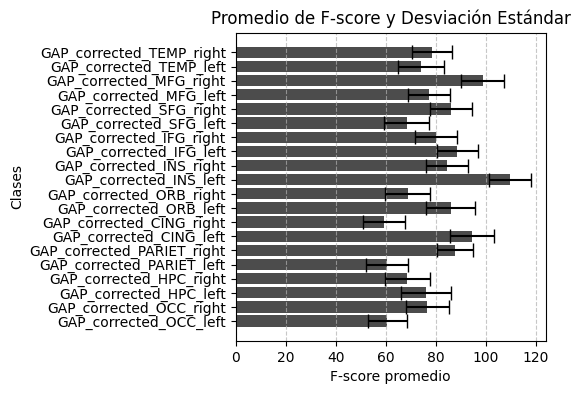

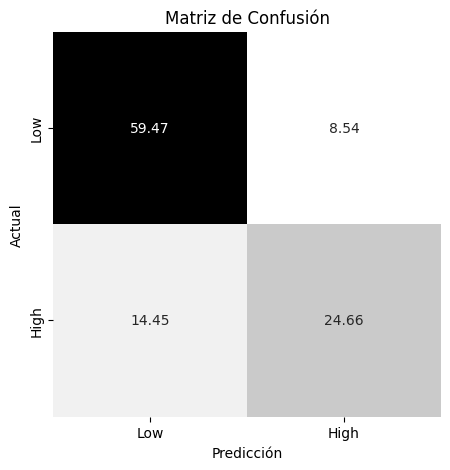

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Datos de ejemplo
#f_scores = [0.82, 0.78]  # Promedio de F-score por clase
#f_score_std = [0.04, 0.05]  # Desviación estándar de F-score por clase
df_CN_results_ = pd.read_excel('results/df_CN_results_clocks_freq_complex.xlsx')

gap_corrected_columns = [col for col in df_CN_results_.columns if 'GAP_corrected' in col]

classes = gap_corrected_columns

# Datos de la matriz de confusión
conf_matrix = avg_conf_matrix

# 1. Gráfico de barras horizontal de F-score (Promedio y Desviación Estándar)
plt.figure(figsize=(4, 4))
plt.barh(classes, f_scores, xerr=f_score_std, capsize=5, color='black', alpha=0.7)
plt.ylabel('Clases')
plt.xlabel('F-score promedio')
plt.title('Promedio de F-score y Desviación Estándar')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

classes_ = classes = ['Low', 'High']
# 2. Matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Greys', cbar=False,
            xticklabels=classes_, yticklabels=classes)
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


# Aperiodic

In [ ]:
# Concatenar los dataframes como entrada
df_concatenado_CN = pd.concat([X_CN_aperiodic, y_CN, ID_CN], axis=1, ignore_index=False)
df_concatenado_AD = pd.concat([X_AD_aperiodic, y_AD, ID_AD], axis=1, ignore_index=False)
df_concatenado_FTD = pd.concat([X_FTD_aperiodic, y_FTD, ID_FTD], axis=1, ignore_index=False)

df_concatenado_pacientes = [df_concatenado_AD, df_concatenado_FTD]

# Nombres de las regiones
nombres_regiones = [
    'OCC_left', 'OCC_right', 'HPC_left', 'HPC_right', 
    'PARIET_left', 'PARIET_right', 'CING_left', 'CING_right', 
    'ORB_left', 'ORB_right', 'INS_left', 'INS_right', 
    'IFG_left', 'IFG_right', 'SFG_left', 'SFG_right', 
    'MFG_left', 'MFG_right','TEMP_left','TEMP_right'
]

# Llamar a la función
resultados = pipeline_regression_clocks(
    df_concatenado_CN=df_concatenado_CN, 
    df_concatenado_pacientes=df_concatenado_pacientes, 
    nombres_regiones=nombres_regiones,
    model_reg=model_reg  # Debe estar definido en tu entorno
)

# Desempaquetar resultados
(columnas_por_region,   
 (opt_models, best_params), 
 (results_labels_CN_train, results_labels_CN_test, results_models, 
  results_folds_CN_train, results_folds_CN_test, results_avg_CN_train, results_avg_CN_test),
 (results_labels_test_Patient, results_folds_test_Patient, results_avg_test_Patient),
 (df_results_clocks_CN, df_results_clocks_AD, df_results_clocks_FTD)) = resultados


In [60]:
def combinar_resultados(df_base, df_resultados, df_seleccionado, columnas_extra):
   
    df_seleccionado = df_seleccionado[['ID-unique'] + columnas_extra]
    df_combinado = df_resultados.merge(df_seleccionado, on='ID-unique', how='left')
    return df_combinado

columnas_extra = ['Country_ID', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']

df_CN_combined_clocks = combinar_resultados(df_results_clocks_CN, df_results_clocks_CN, df_CN_filtrado, columnas_extra)
df_AD_combined_clocks = combinar_resultados(df_results_clocks_AD, df_results_clocks_AD, df_AD_filtrado, columnas_extra)
df_FTD_combined_clocks = combinar_resultados(df_results_clocks_FTD, df_results_clocks_FTD, df_FTD_filtrado, columnas_extra)

df_CN_combined_clocks.to_excel('results/df_CN_results_clocks_aperiodic.xlsx', index=False)
df_AD_combined_clocks.to_excel('results/df_AD_results_clocks_aperiodic.xlsx', index=False)
df_FTD_combined_clocks.to_excel('results/df_FTD_results_clocks_aperiodic.xlsx', index=False)
#df_MCI_combined.to_excel('results/df_MCI_results_all_features.xlsx', index=False)

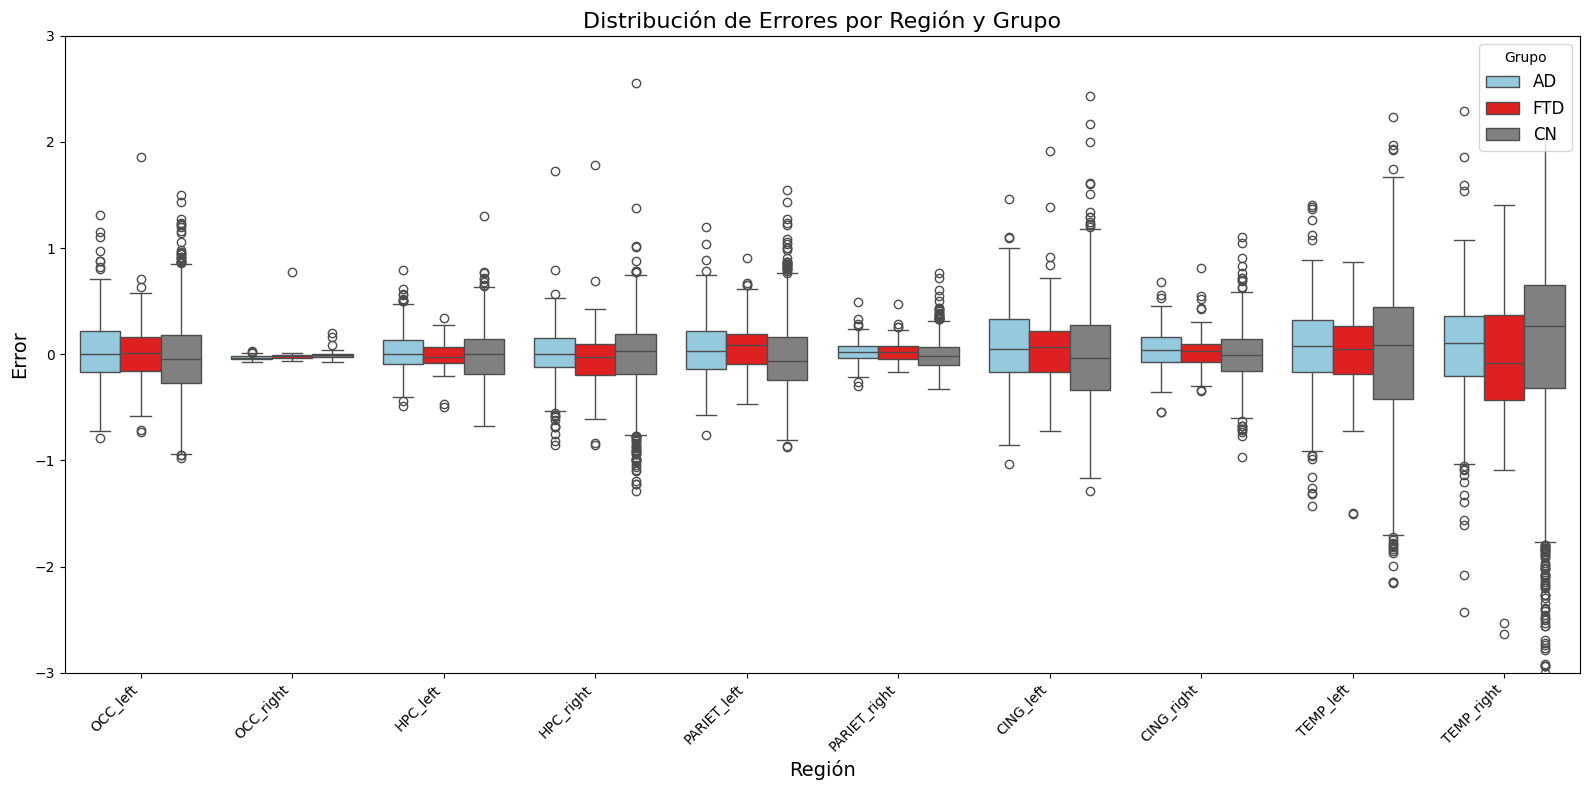

In [70]:
# Definir los datos de entrada
colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'CN': 'gray'
}

# Llamar a la función
plot_error_distribution(results_avg_test_Patient, results_avg_CN_test, nombres_regiones, colores_personalizados)


In [ ]:

file_paths = {
    'CN': 'results/df_CN_results_clocks_aperiodic.xlsx',
    'AD': 'results/df_AD_results_clocks_aperiodic.xlsx',
    'FTD': 'results/df_FTD_results_clocks_aperiodic.xlsx'
}

# Llamada a la función
results = pipeline_model_training(
    file_paths=file_paths,
    model_cls=model_cls,
    n_iter_=30,
    scoring_metric='accuracy',
    n_splits=10,
    n_iterations=20,
    scaler_type=3
)

# Desempaquetar resultados
opt_model_cls, results_labels_df_train, results_labels_df_test, results_model, results_per_fold_train, results_per_fold_test = results


In [72]:
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix

# Función para calcular métricas de clasificación
def clf_metrics(y_true, y_pred, y_prob):
    # Calcular métricas de clasificación
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    return {
        "AUC": auc(fpr, tpr),
        "FPR": fpr,
        "TPR": tpr,
        "Thresholds": thresholds,
        "F1 Score": f1_score(y_true, y_pred),
        "Accuracy": accuracy_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Confusion Matrix": confusion_matrix(y_true, y_pred),
    }

# Lista de métricas por fold
metrics_per_fold_cls = [
    clf_metrics(fold['y_labels'], fold['y_pred'], fold['y_prob'])
    for fold in results_per_fold_test
]

# Consolidar métricas por tipo
metrics_ = {key: [] for key in metrics_per_fold_cls[0].keys()}
for metrics in metrics_per_fold_cls:
    for key, value in metrics.items():
        metrics_[key].append(value)


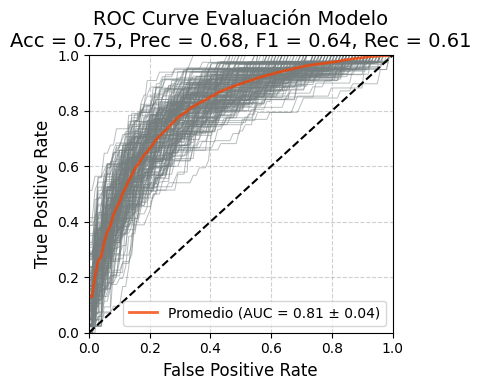

In [73]:
graph_roc(metrics_, title="Evaluación Modelo")


In [74]:
import numpy as np

# Inicializa una lista para almacenar los F-scores de cada modelo
f_scores_all = []

# Recorre los 200 modelos
for i in range(200):
    # Obtén los F-scores del modelo i
    f_scores = results_model['model'][i].get_booster().get_score()
    # Convierte el diccionario de F-scores en una lista y agrégala a f_scores_all
    f_scores_all.append(list(f_scores.values()))

# Transforma la lista de listas en un arreglo de numpy para facilitar cálculos
f_scores_array = np.array(f_scores_all)
    
# Calcula el promedio y la desviación estándar de los F-scores por clase
f_scores_avg = np.mean(f_scores_array, axis=0)
f_scores_std = np.std(f_scores_array, axis=0)

# Guarda los resultados en el formato requerido
f_scores = list(f_scores_avg)
f_score_std = list(f_scores_std)

print("f_scores =", f_scores)  # Promedio de F-score por clase
print("f_score_std =", f_score_std)  # Desviación estándar de F-score por clase

avg_conf_matrix = np.mean(np.array(metrics_["Confusion Matrix"]), axis=0)

f_scores = [116.145, 156.235, 111.86, 109.75, 108.69, 110.34, 89.425, 87.315, 109.64, 154.91]
f_score_std = [11.37602632732537, 11.009985240680386, 9.595853271074963, 9.923583022275775, 9.288912745849215, 9.531232868837066, 9.695069623267285, 9.495039494388637, 10.29613519724756, 11.215698819066063]


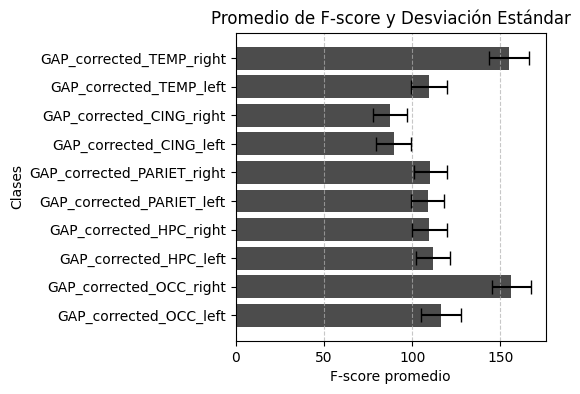

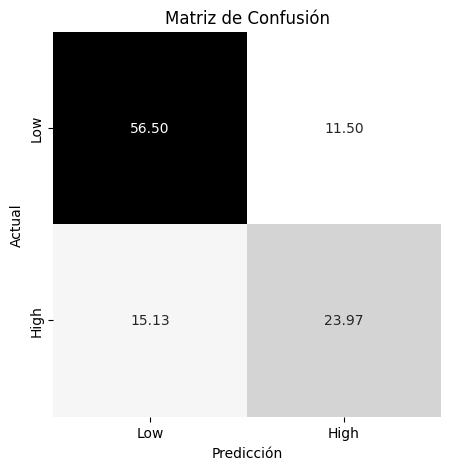

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Datos de ejemplo
#f_scores = [0.82, 0.78]  # Promedio de F-score por clase
#f_score_std = [0.04, 0.05]  # Desviación estándar de F-score por clase
df_CN_results_ = pd.read_excel('results/df_CN_results_clocks_aperiodic.xlsx')

gap_corrected_columns = [col for col in df_CN_results_.columns if 'GAP_corrected' in col]

classes = gap_corrected_columns

# Datos de la matriz de confusión
conf_matrix = avg_conf_matrix

# 1. Gráfico de barras horizontal de F-score (Promedio y Desviación Estándar)
plt.figure(figsize=(4, 4))
plt.barh(classes, f_scores, xerr=f_score_std, capsize=5, color='black', alpha=0.7)
plt.ylabel('Clases')
plt.xlabel('F-score promedio')
plt.title('Promedio de F-score y Desviación Estándar')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

classes_ = classes = ['Low', 'High']
# 2. Matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Greys', cbar=False,
            xticklabels=classes_, yticklabels=classes)
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


# Complex

In [ ]:
# Concatenar los dataframes como entrada
df_concatenado_CN = pd.concat([X_CN_complex, y_CN, ID_CN], axis=1, ignore_index=False)
df_concatenado_AD = pd.concat([X_AD_complex, y_AD, ID_AD], axis=1, ignore_index=False)
df_concatenado_FTD = pd.concat([X_FTD_complex, y_FTD, ID_FTD], axis=1, ignore_index=False)

df_concatenado_pacientes = [df_concatenado_AD, df_concatenado_FTD]

# Nombres de las regiones
nombres_regiones = [
    'OCC_left', 'OCC_right', 'HPC_left', 'HPC_right', 
    'PARIET_left', 'PARIET_right', 'CING_left', 'CING_right', 
    'ORB_left', 'ORB_right', 'INS_left', 'INS_right', 
    'IFG_left', 'IFG_right', 'SFG_left', 'SFG_right', 
    'MFG_left', 'MFG_right','TEMP_left','TEMP_right'
]

# Llamar a la función
resultados = pipeline_regression_clocks(
    df_concatenado_CN=df_concatenado_CN, 
    df_concatenado_pacientes=df_concatenado_pacientes, 
    nombres_regiones=nombres_regiones,
    model_reg=model_reg  # Debe estar definido en tu entorno
)

# Desempaquetar resultados
(columnas_por_region,   
 (opt_models, best_params), 
 (results_labels_CN_train, results_labels_CN_test, results_models, 
  results_folds_CN_train, results_folds_CN_test, results_avg_CN_train, results_avg_CN_test),
 (results_labels_test_Patient, results_folds_test_Patient, results_avg_test_Patient),
 (df_results_clocks_CN, df_results_clocks_AD, df_results_clocks_FTD)) = resultados


In [77]:
def combinar_resultados(df_base, df_resultados, df_seleccionado, columnas_extra):
   
    df_seleccionado = df_seleccionado[['ID-unique'] + columnas_extra]
    df_combinado = df_resultados.merge(df_seleccionado, on='ID-unique', how='left')
    return df_combinado

columnas_extra = ['Country_ID', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']

df_CN_combined_clocks = combinar_resultados(df_results_clocks_CN, df_results_clocks_CN, df_CN_filtrado, columnas_extra)
df_AD_combined_clocks = combinar_resultados(df_results_clocks_AD, df_results_clocks_AD, df_AD_filtrado, columnas_extra)
df_FTD_combined_clocks = combinar_resultados(df_results_clocks_FTD, df_results_clocks_FTD, df_FTD_filtrado, columnas_extra)

df_CN_combined_clocks.to_excel('results/df_CN_results_clocks_complex.xlsx', index=False)
df_AD_combined_clocks.to_excel('results/df_AD_results_clocks_complex.xlsx', index=False)
df_FTD_combined_clocks.to_excel('results/df_FTD_results_clocks_complex.xlsx', index=False)
#df_MCI_combined.to_excel('results/df_MCI_results_all_features.xlsx', index=False)

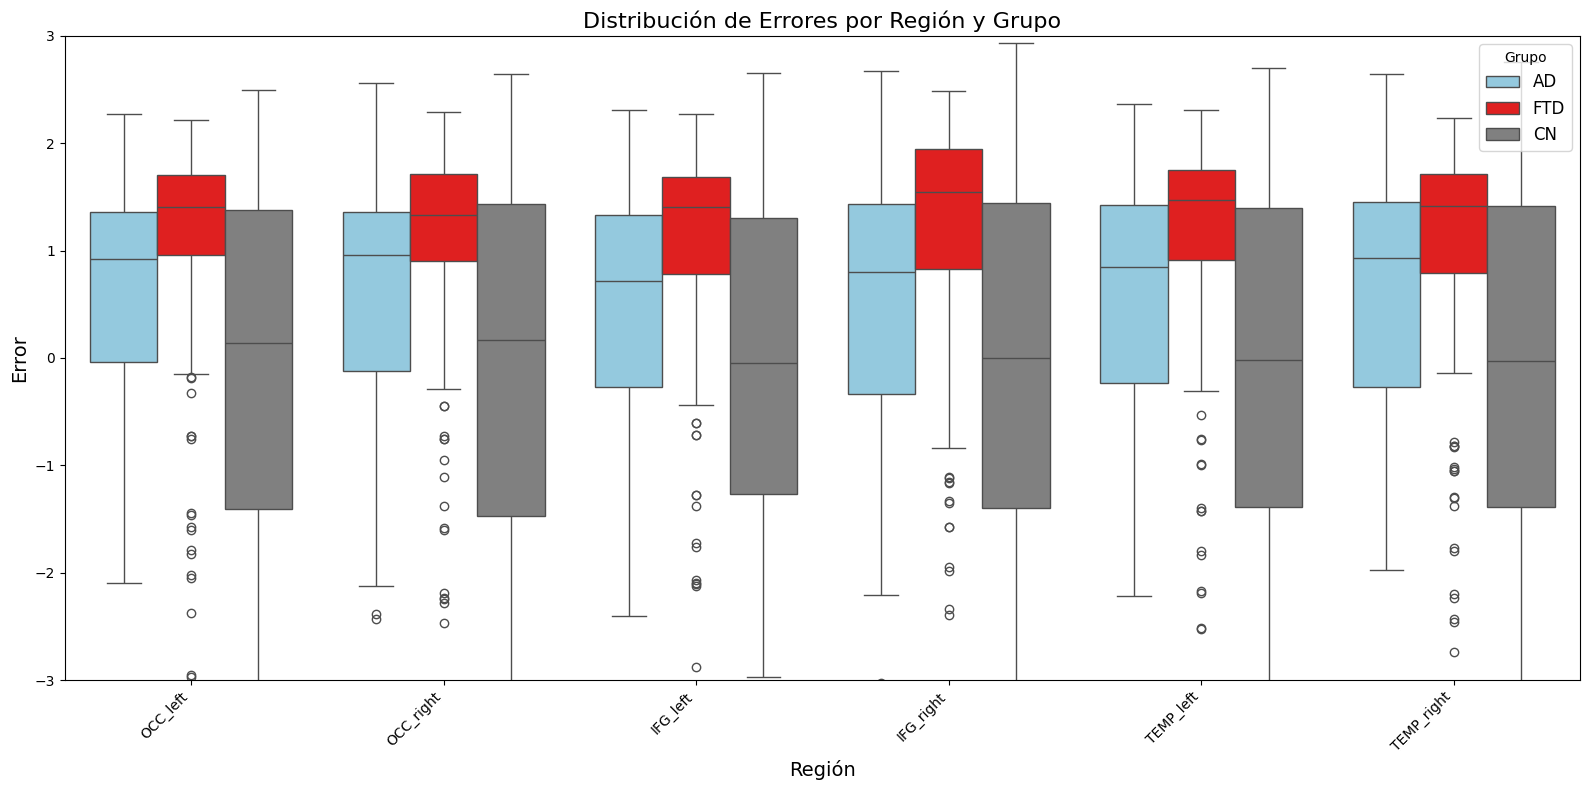

In [78]:
# Definir los datos de entrada
colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'CN': 'gray'
}

# Llamar a la función
plot_error_distribution(results_avg_test_Patient, results_avg_CN_test, nombres_regiones, colores_personalizados)


In [79]:

file_paths = {
    'CN': 'results/df_CN_results_clocks_complex.xlsx',
    'AD': 'results/df_AD_results_clocks_complex.xlsx',
    'FTD': 'results/df_FTD_results_clocks_complex.xlsx'
}

# Llamada a la función
results = pipeline_model_training(
    file_paths=file_paths,
    model_cls=model_cls,
    n_iter_=30,
    scoring_metric='accuracy',
    n_splits=10,
    n_iterations=20,
    scaler_type=3
)

# Desempaquetar resultados
opt_model_cls, results_labels_df_train, results_labels_df_test, results_model, results_per_fold_train, results_per_fold_test = results


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock\base_classifier.py:195: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock\base_classifier.py:197: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_labels_df_test, tem

In [80]:
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix

# Función para calcular métricas de clasificación
def clf_metrics(y_true, y_pred, y_prob):
    # Calcular métricas de clasificación
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    return {
        "AUC": auc(fpr, tpr),
        "FPR": fpr,
        "TPR": tpr,
        "Thresholds": thresholds,
        "F1 Score": f1_score(y_true, y_pred),
        "Accuracy": accuracy_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Confusion Matrix": confusion_matrix(y_true, y_pred),
    }

# Lista de métricas por fold
metrics_per_fold_cls = [
    clf_metrics(fold['y_labels'], fold['y_pred'], fold['y_prob'])
    for fold in results_per_fold_test
]

# Consolidar métricas por tipo
metrics_ = {key: [] for key in metrics_per_fold_cls[0].keys()}
for metrics in metrics_per_fold_cls:
    for key, value in metrics.items():
        metrics_[key].append(value)


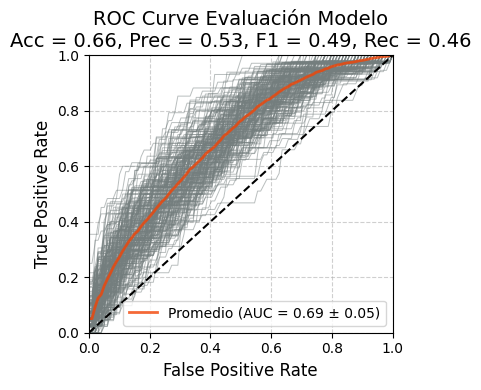

In [81]:
graph_roc(metrics_, title="Evaluación Modelo")


In [82]:
import numpy as np

# Inicializa una lista para almacenar los F-scores de cada modelo
f_scores_all = []

# Recorre los 200 modelos
for i in range(200):
    # Obtén los F-scores del modelo i
    f_scores = results_model['model'][i].get_booster().get_score()
    # Convierte el diccionario de F-scores en una lista y agrégala a f_scores_all
    f_scores_all.append(list(f_scores.values()))

# Transforma la lista de listas en un arreglo de numpy para facilitar cálculos
f_scores_array = np.array(f_scores_all)
    
# Calcula el promedio y la desviación estándar de los F-scores por clase
f_scores_avg = np.mean(f_scores_array, axis=0)
f_scores_std = np.std(f_scores_array, axis=0)

# Guarda los resultados en el formato requerido
f_scores = list(f_scores_avg)
f_score_std = list(f_scores_std)

print("f_scores =", f_scores)  # Promedio de F-score por clase
print("f_score_std =", f_score_std)  # Desviación estándar de F-score por clase

avg_conf_matrix = np.mean(np.array(metrics_["Confusion Matrix"]), axis=0)

f_scores = [238.36, 278.655, 207.69, 264.89, 280.46, 250.145]
f_score_std = [14.981668798902213, 16.948922532125753, 15.85035961737146, 14.927421076662906, 15.742884106795678, 16.27464208515812]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Datos de ejemplo
#f_scores = [0.82, 0.78]  # Promedio de F-score por clase
#f_score_std = [0.04, 0.05]  # Desviación estándar de F-score por clase
df_CN_results_ = pd.read_excel('results/df_CN_results_clocks_complex.xlsx')

gap_corrected_columns = [col for col in df_CN_results_.columns if 'GAP_corrected' in col]

classes = gap_corrected_columns

# Datos de la matriz de confusión
conf_matrix = avg_conf_matrix

# 1. Gráfico de barras horizontal de F-score (Promedio y Desviación Estándar)
plt.figure(figsize=(4, 4))
plt.barh(classes, f_scores, xerr=f_score_std, capsize=5, color='black', alpha=0.7)
plt.ylabel('Clases')
plt.xlabel('F-score promedio')
plt.title('Promedio de F-score y Desviación Estándar')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

classes_ = classes = ['Low', 'High']
# 2. Matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Greys', cbar=False,
            xticklabels=classes_, yticklabels=classes)
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


# Aperiodic + Complex

In [ ]:
# Concatenar los dataframes como entrada
df_concatenado_CN = pd.concat([X_CN_aperiodic,X_CN_complex, y_CN, ID_CN], axis=1, ignore_index=False)
df_concatenado_AD = pd.concat([X_AD_aperiodic,X_AD_complex, y_AD, ID_AD], axis=1, ignore_index=False)
df_concatenado_FTD = pd.concat([X_FTD_aperiodic,X_FTD_complex, y_FTD, ID_FTD], axis=1, ignore_index=False)

df_concatenado_pacientes = [df_concatenado_AD, df_concatenado_FTD]

# Nombres de las regiones
nombres_regiones = [
    'OCC_left', 'OCC_right', 'HPC_left', 'HPC_right', 
    'PARIET_left', 'PARIET_right', 'CING_left', 'CING_right', 
    'ORB_left', 'ORB_right', 'INS_left', 'INS_right', 
    'IFG_left', 'IFG_right', 'SFG_left', 'SFG_right', 
    'MFG_left', 'MFG_right','TEMP_left','TEMP_right'
]

# Llamar a la función
resultados = pipeline_regression_clocks(
    df_concatenado_CN=df_concatenado_CN, 
    df_concatenado_pacientes=df_concatenado_pacientes, 
    nombres_regiones=nombres_regiones,
    model_reg=model_reg  # Debe estar definido en tu entorno
)

# Desempaquetar resultados
(columnas_por_region,   
 (opt_models, best_params), 
 (results_labels_CN_train, results_labels_CN_test, results_models, 
  results_folds_CN_train, results_folds_CN_test, results_avg_CN_train, results_avg_CN_test),
 (results_labels_test_Patient, results_folds_test_Patient, results_avg_test_Patient),
 (df_results_clocks_CN, df_results_clocks_AD, df_results_clocks_FTD)) = resultados


In [84]:
def combinar_resultados(df_base, df_resultados, df_seleccionado, columnas_extra):
   
    df_seleccionado = df_seleccionado[['ID-unique'] + columnas_extra]
    df_combinado = df_resultados.merge(df_seleccionado, on='ID-unique', how='left')
    return df_combinado

columnas_extra = ['Country_ID', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']

df_CN_combined_clocks = combinar_resultados(df_results_clocks_CN, df_results_clocks_CN, df_CN_filtrado, columnas_extra)
df_AD_combined_clocks = combinar_resultados(df_results_clocks_AD, df_results_clocks_AD, df_AD_filtrado, columnas_extra)
df_FTD_combined_clocks = combinar_resultados(df_results_clocks_FTD, df_results_clocks_FTD, df_FTD_filtrado, columnas_extra)

df_CN_combined_clocks.to_excel('results/df_CN_results_clocks_aperiodic_complex.xlsx', index=False)
df_AD_combined_clocks.to_excel('results/df_AD_results_clocks_aperiodic_complex.xlsx', index=False)
df_FTD_combined_clocks.to_excel('results/df_FTD_results_clocks_aperiodic_complex.xlsx', index=False)
#df_MCI_combined.to_excel('results/df_MCI_results_all_features.xlsx', index=False)

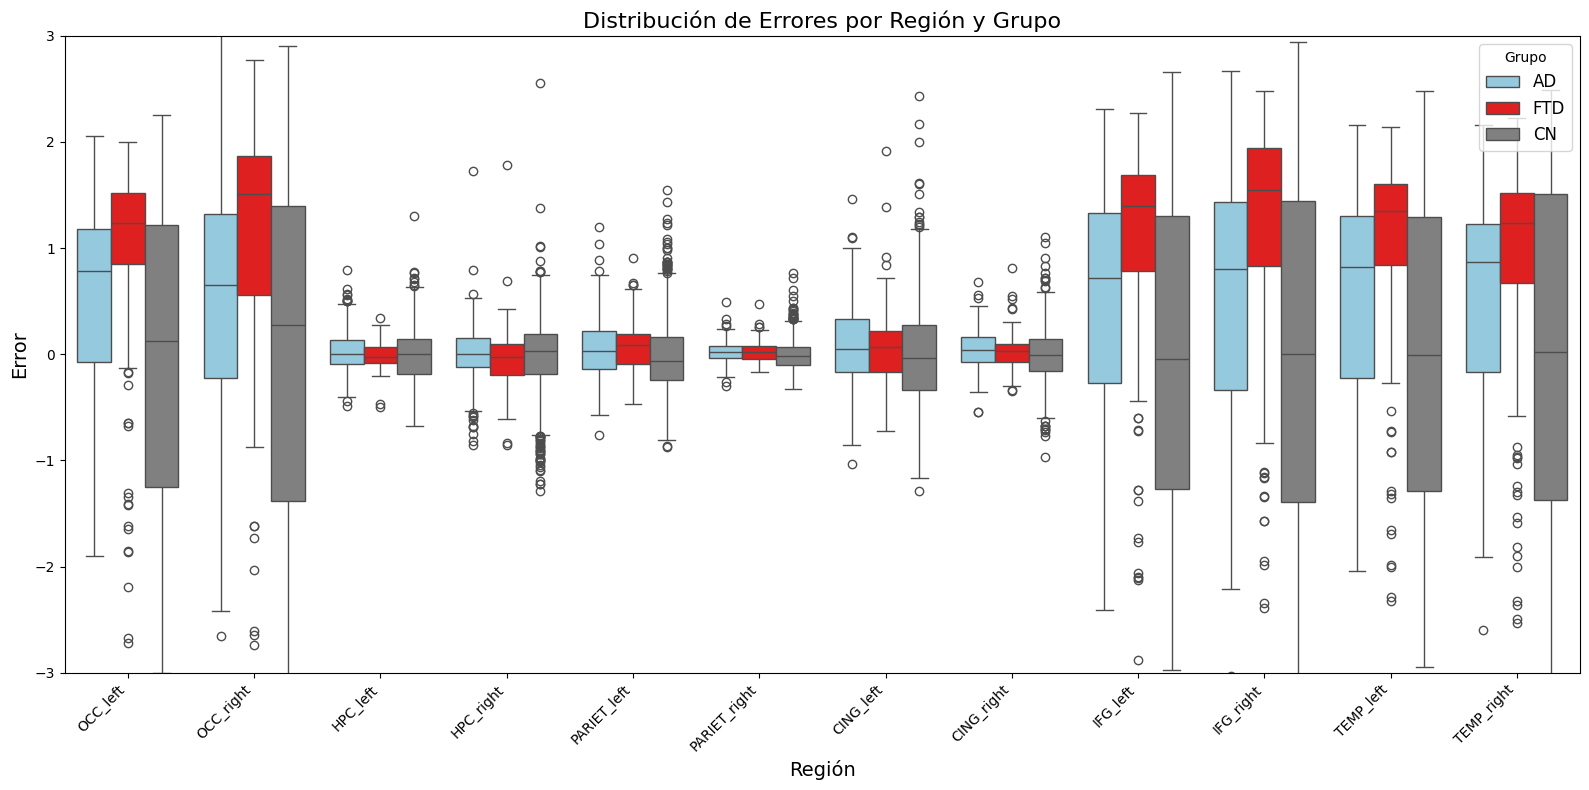

In [85]:
# Definir los datos de entrada
colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'CN': 'gray'
}

# Llamar a la función
plot_error_distribution(results_avg_test_Patient, results_avg_CN_test, nombres_regiones, colores_personalizados)


In [ ]:

file_paths = {
    'CN': 'results/df_CN_results_clocks_aperiodic_complex.xlsx',
    'AD': 'results/df_AD_results_clocks_aperiodic_complex.xlsx',
    'FTD': 'results/df_FTD_results_clocks_aperiodic_complex.xlsx'
}

# Llamada a la función
results = pipeline_model_training(
    file_paths=file_paths,
    model_cls=model_cls,
    n_iter_=30,
    scoring_metric='accuracy',
    n_splits=10,
    n_iterations=20,
    scaler_type=3
)

# Desempaquetar resultados
opt_model_cls, results_labels_df_train, results_labels_df_test, results_model, results_per_fold_train, results_per_fold_test = results


In [87]:
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix

# Función para calcular métricas de clasificación
def clf_metrics(y_true, y_pred, y_prob):
    # Calcular métricas de clasificación
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    return {
        "AUC": auc(fpr, tpr),
        "FPR": fpr,
        "TPR": tpr,
        "Thresholds": thresholds,
        "F1 Score": f1_score(y_true, y_pred),
        "Accuracy": accuracy_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Confusion Matrix": confusion_matrix(y_true, y_pred),
    }

# Lista de métricas por fold
metrics_per_fold_cls = [
    clf_metrics(fold['y_labels'], fold['y_pred'], fold['y_prob'])
    for fold in results_per_fold_test
]

# Consolidar métricas por tipo
metrics_ = {key: [] for key in metrics_per_fold_cls[0].keys()}
for metrics in metrics_per_fold_cls:
    for key, value in metrics.items():
        metrics_[key].append(value)


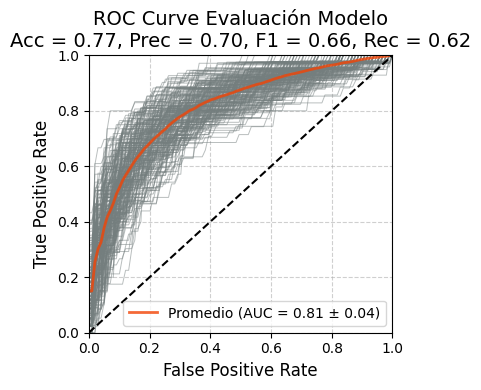

In [88]:
graph_roc(metrics_, title="Evaluación Modelo")


In [89]:
import numpy as np

# Inicializa una lista para almacenar los F-scores de cada modelo
f_scores_all = []

# Recorre los 200 modelos
for i in range(200):
    # Obtén los F-scores del modelo i
    f_scores = results_model['model'][i].get_booster().get_score()
    # Convierte el diccionario de F-scores en una lista y agrégala a f_scores_all
    f_scores_all.append(list(f_scores.values()))

# Transforma la lista de listas en un arreglo de numpy para facilitar cálculos
f_scores_array = np.array(f_scores_all)
    
# Calcula el promedio y la desviación estándar de los F-scores por clase
f_scores_avg = np.mean(f_scores_array, axis=0)
f_scores_std = np.std(f_scores_array, axis=0)

# Guarda los resultados en el formato requerido
f_scores = list(f_scores_avg)
f_score_std = list(f_scores_std)

print("f_scores =", f_scores)  # Promedio de F-score por clase
print("f_score_std =", f_score_std)  # Desviación estándar de F-score por clase

avg_conf_matrix = np.mean(np.array(metrics_["Confusion Matrix"]), axis=0)

f_scores = [120.91, 131.005, 159.835, 187.46, 134.9, 136.225, 134.395, 126.76, 101.515, 156.845, 136.62, 181.01]
f_score_std = [11.015529946398404, 11.806141410299977, 11.675948569602385, 12.481522343047741, 12.669254121691617, 11.544019014190852, 11.165526185540926, 13.115731012795283, 10.31696539685968, 11.803854243424048, 11.515884681603932, 10.829122771489848]


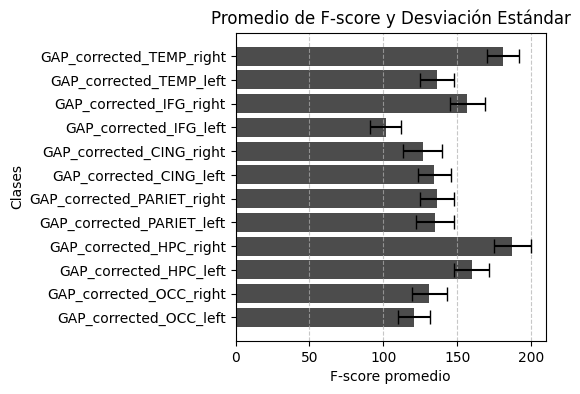

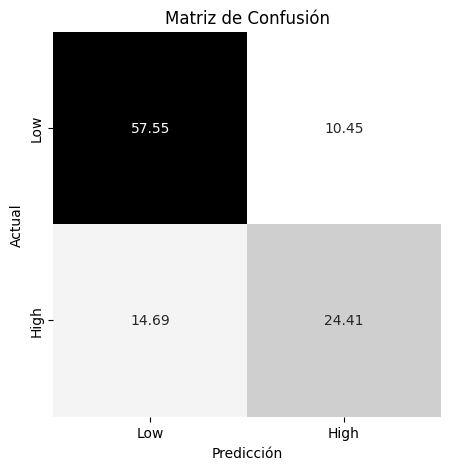

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Datos de ejemplo
#f_scores = [0.82, 0.78]  # Promedio de F-score por clase
#f_score_std = [0.04, 0.05]  # Desviación estándar de F-score por clase
df_CN_results_ = pd.read_excel('results/df_CN_results_clocks_aperiodic_complex.xlsx')

gap_corrected_columns = [col for col in df_CN_results_.columns if 'GAP_corrected' in col]

classes = gap_corrected_columns

# Datos de la matriz de confusión
conf_matrix = avg_conf_matrix

# 1. Gráfico de barras horizontal de F-score (Promedio y Desviación Estándar)
plt.figure(figsize=(4, 4))
plt.barh(classes, f_scores, xerr=f_score_std, capsize=5, color='black', alpha=0.7)
plt.ylabel('Clases')
plt.xlabel('F-score promedio')
plt.title('Promedio de F-score y Desviación Estándar')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

classes_ = classes = ['Low', 'High']
# 2. Matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Greys', cbar=False,
            xticklabels=classes_, yticklabels=classes)
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()
